In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\dg239\Downloads\Automobile_insurance_fraud.csv")
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None)
df.head()

No of Rows: 1000
No of Columns: 40


months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [3]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'], float64: ['policy_annual_premium', '_c39'], object: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

# Data Integrity Check

**Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.**

In [4]:
df.duplicated('policy_number').sum()

0

**Let check if any whitespace, 'NA' or '-' exist in dataset.**

In [5]:
df.isin([' ','NA','-']).sum().any()

False

In [6]:
df.isin(['?']).sum().any()

True

# Let replace '?' with np.NaN 

In [7]:
df=df.replace('?',np.NaN)

# Missing value check

In [8]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                             Missing Values  % Missing data
_c39                                   1000           100.0
property_damage                         360            36.0
police_report_available                 343            34.3
collision_type                          178            17.8
bodily_injuries                           0             0.0
incident_state                            0             0.0
incident_city                             0             0.0
incident_location                         0             0.0
incident_hour_of_the_day                  0             0.0
number_of_vehicles_involved               0             0.0
fraud_reported                            0             0.0
auto_year                                 0             0.0
auto_model                                0             0.0
authorities_contacted                     0             0.0
total_claim_amount                        0             0.0
injury_claim                            

- 'property_damage','police_report_available','collision_type' contain missing values.
- _c39 columns with 100 % null value. We gone drop it.
- Other missing value feature are categorical in nature. We gone impute them with mode of that particular category.

# Missing value imputation

In [9]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

In [10]:
# Droping unnecessary columns
df.drop(['_c39','incident_location','insured_zip','policy_number'],axis=1,inplace=True)

**Missing value check after imputation**

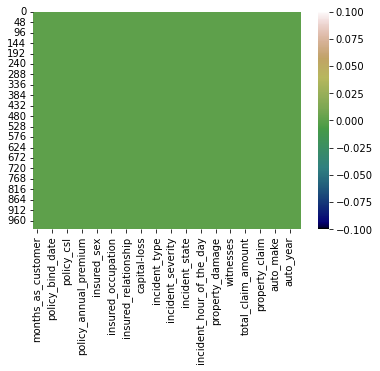

In [11]:
# Heatmap of missing value
sns.heatmap(df.isnull(),cmap="gist_earth")
plt.show()

**Finally, No Missing Value is Present.**

Something details on Policy_csl column :

-    Combined single limit (CSL):

CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident.

-    In this dataset Policy_csl columns have numerical data separated by '/', resulting into object datatype.
-    We will split this column into two CSL columns for person and accident.


# Exploratory Data Analysis

In [12]:
# Spliting and extracting policy_csl at '/'
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]

In [13]:
# Now we can drop policy_csl column 
df.drop("policy_csl",axis=1,inplace=True)

**We have two feature here with datetime datatypes. We gone split them in terms of date,month and year.**

In [14]:
# Converting Date columns from object type into datetime data type
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [15]:
# Extracting Day, Month and Year column from policy_bind_date
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

# Extracting Day, Month and Year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [16]:
# Since Extraction is done now we can Drop policy_bind_date and incident_date columns
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [17]:
# Incident year for all data is 2015 so we gone drop it.
df.drop(['incident_year'],axis=1,inplace=True)

**We have one column name as 'auto_year' which depict year from which Automobile in operational on road. In simple word Automobile age. Here we will do some simple feature engineering to create new columns with automobile age and drop eariler.**

**As incident year is 2015, we will use 2015 as base year for new column creation.**

In [18]:
# Lets extract age of the vehicle from auto_year by subtracting it from the year 2018
df['Automobile_Age']=2015 - df['auto_year']
# Droping auto year column
df.drop("auto_year",axis=1,inplace=True)

**Spliting feature in categorical and numerical variable**

In [19]:
# Checking categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
    print("Categorical Columns:",categorical_col)
    

Categorical Columns: []
Categorical Columns: []
Categorical Columns: ['policy_state']
Categorical Columns: ['policy_state']
Categorical Columns: ['policy_state']
Categorical Columns: ['policy_state']
Categorical Columns: ['policy_state', 'insured_sex']
Categorical Columns: ['policy_state', 'insured_sex', 'insured_education_level']
Categorical Columns: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation']
Categorical Columns: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies']
Categorical Columns: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship']
Categorical Columns: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship']
Categorical Columns: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship']
Categoric

In [20]:
# Checking for numerical columns:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
    print("Numerical Columns:",numerical_col)

Numerical Columns: ['months_as_customer']
Numerical Columns: ['months_as_customer', 'age']
Numerical Columns: ['months_as_customer', 'age']
Numerical Columns: ['months_as_customer', 'age', 'policy_deductable']
Numerical Columns: ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium']
Numerical Columns: ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit']
Numerical Columns: ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit']
Numerical Columns: ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit']
Numerical Columns: ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit']
Numerical Columns: ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit']
Numerical Columns: ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit']
Numerical Columns

In [21]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']}

# Statistical Matrix

In [22]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

In [23]:
df[categorical_col].describe().T.style.background_gradient(cmap='summer_r')

In [24]:
for i in categorical_col:
    print(i)
    print(df[i].value_counts())
    print("="*100)

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving 

# Start exploring Target variable

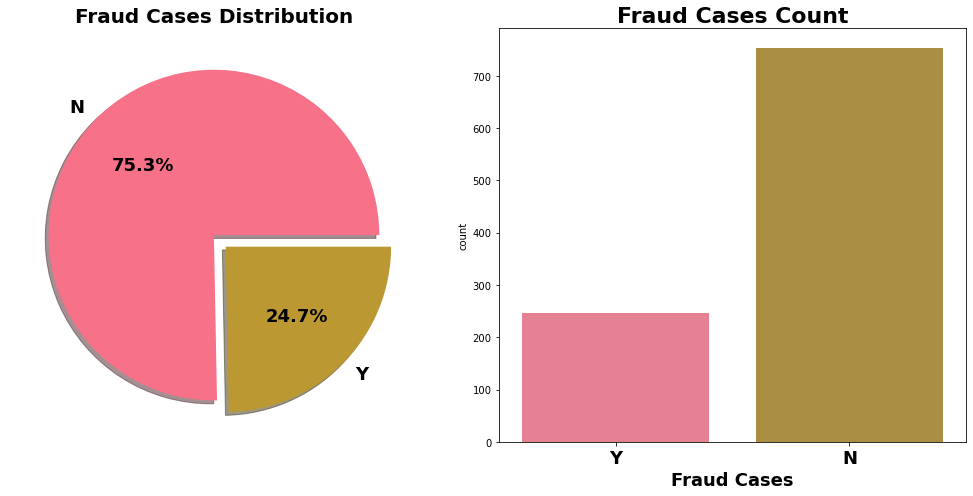

In [25]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(14,7))
df['fraud_reported'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Fraud Cases Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('fraud_reported',data=df,ax=ax[1])
ax[1].set_title('Fraud Cases Count',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Fraud Cases",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

-  Out of all cases around 24.7 % cases are Fraud.
-  'fraud_reported' is our target variable to be predicted. From count plot we can say dataset is imbalanced in nature.

**Analysing Age vs Fraud**

In [26]:
print('Minimum Age :',df.age.min(),'Years')
print('Maximum Age :',df.age.max(),'Years')
print('Average Age :',df.age.mean(),'Years')

Minimum Age : 19 Years
Maximum Age : 64 Years
Average Age : 38.948 Years


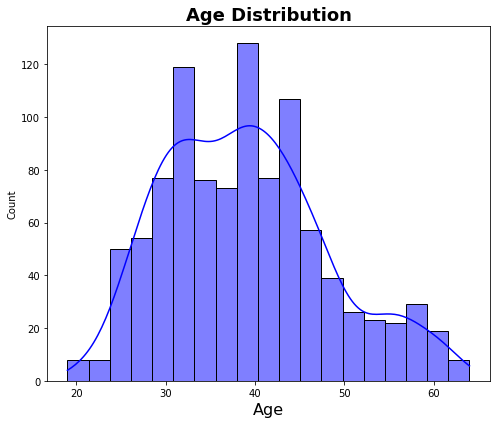

In [27]:
plt.figure(figsize=(7,6))
sns.histplot(df.age, kde=True, color='b')
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

In [28]:
# Spliting age in different age range
df['age_bins'] = pd.cut(df.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], 
                          include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

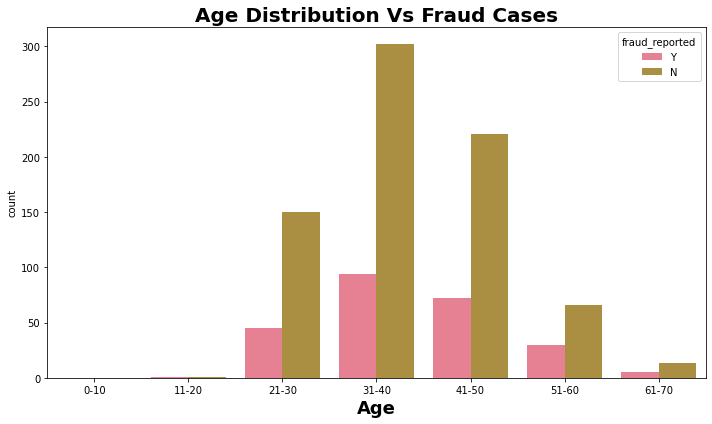

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.age_bins, hue=df.fraud_reported)
plt.xlabel('Age',fontsize=18,fontweight ='bold')
plt.title('Age Distribution Vs Fraud Cases', fontsize=20,fontweight ='bold')
plt.show()

-  Maximum fraud cases comes from people with age group of 31-50 year.
-  Very few cases in 60+ year old peoples.

# Policy State Vs Fraud cases

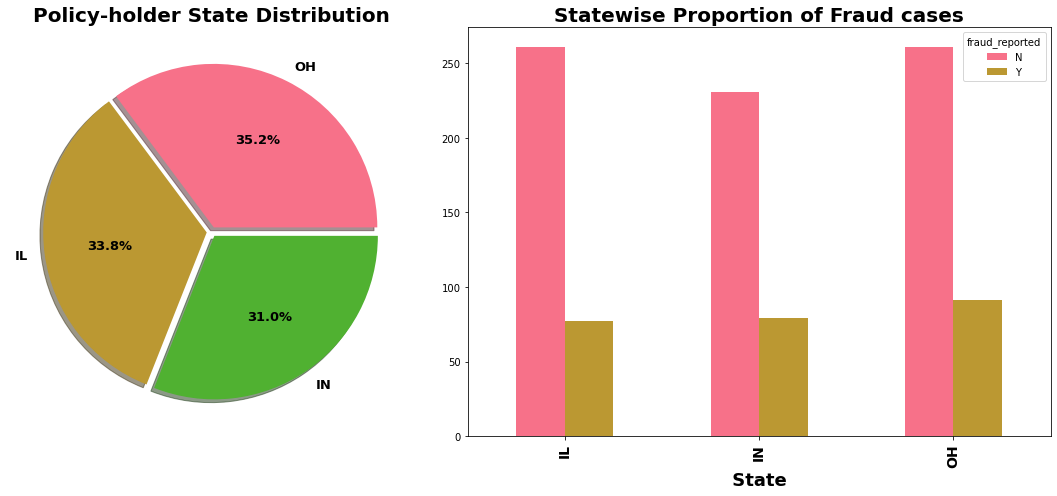

In [30]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['policy_state'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder State Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['policy_state'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Statewise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" State ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

-  Almost same amout of cases come from each state.
-  Maximum fraud cases come from state of Ohio.

**Insured Gender VS Fraud cases**

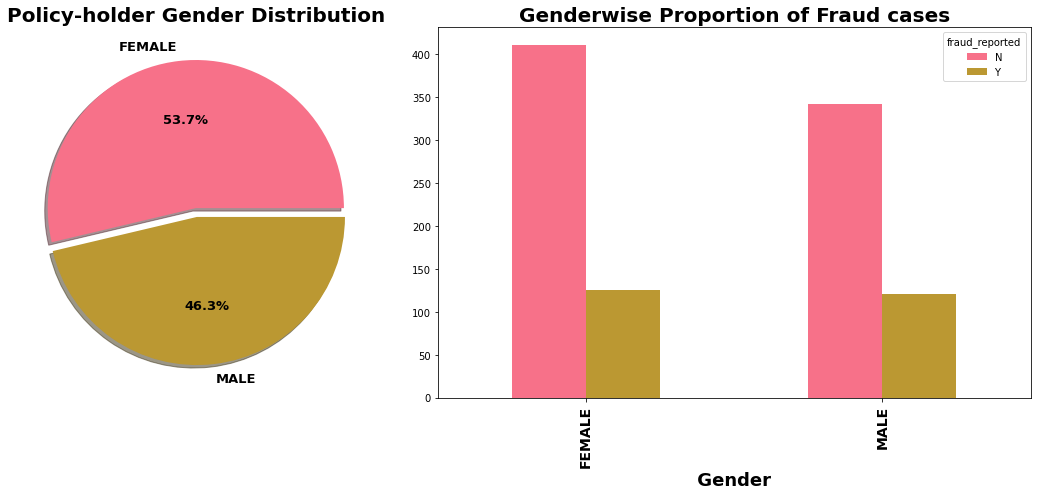

In [31]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_sex'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Gender Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_sex'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Genderwise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Gender ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

-  Number of claims come from female is higher than which reported by male insured.
-  Almost same amount of fraud cases comes from same gender.

**Education_level vs Fraud cases**

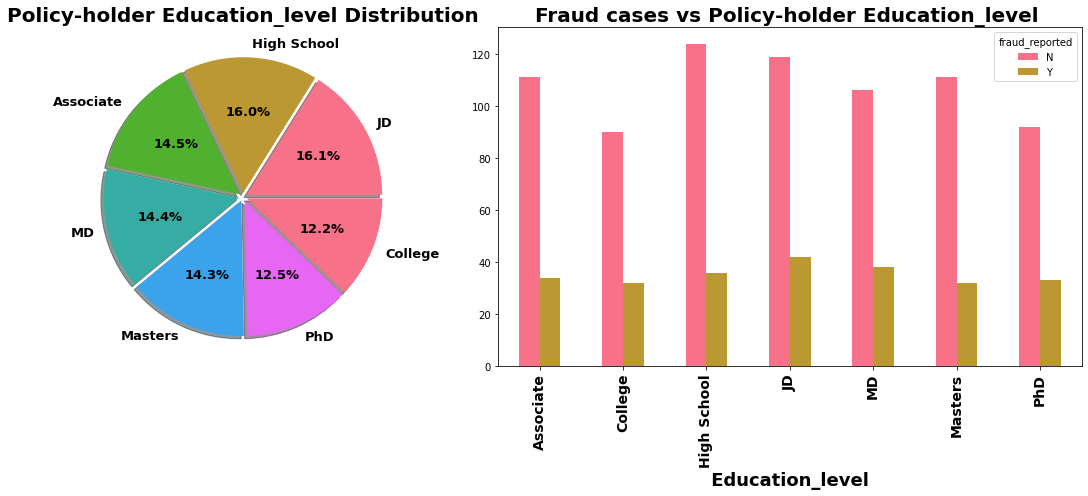

In [32]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_education_level'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Education_level Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_education_level'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases vs Policy-holder Education_level ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Education_level ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

**We can see tendency to make fraud claims has across every education backgroud, even in Masters,PhD. Education Level is not much important variable for us !!!**

# Occupation of Insured Customers

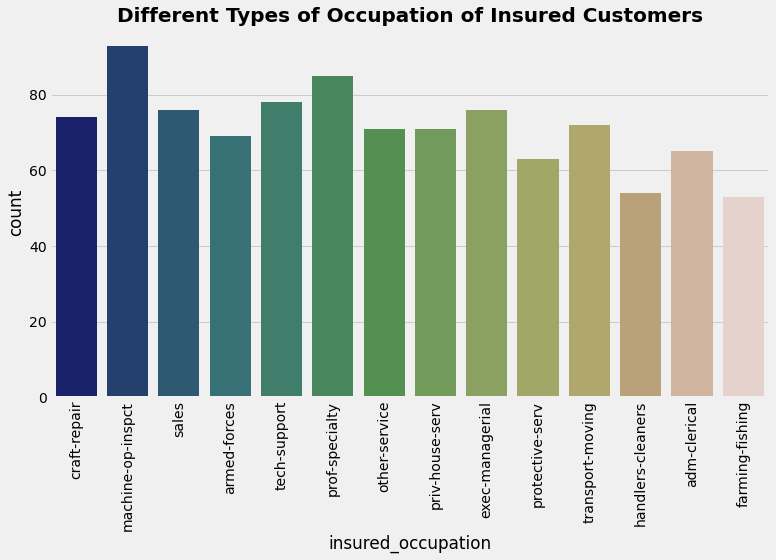

In [33]:
# let's check the insured occupation
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11, 8)
sns.countplot(df['insured_occupation'], palette = 'gist_earth')
plt.title('Different Types of Occupation of Insured Customers' ,fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show()

**Hobbies of Insured Customers**

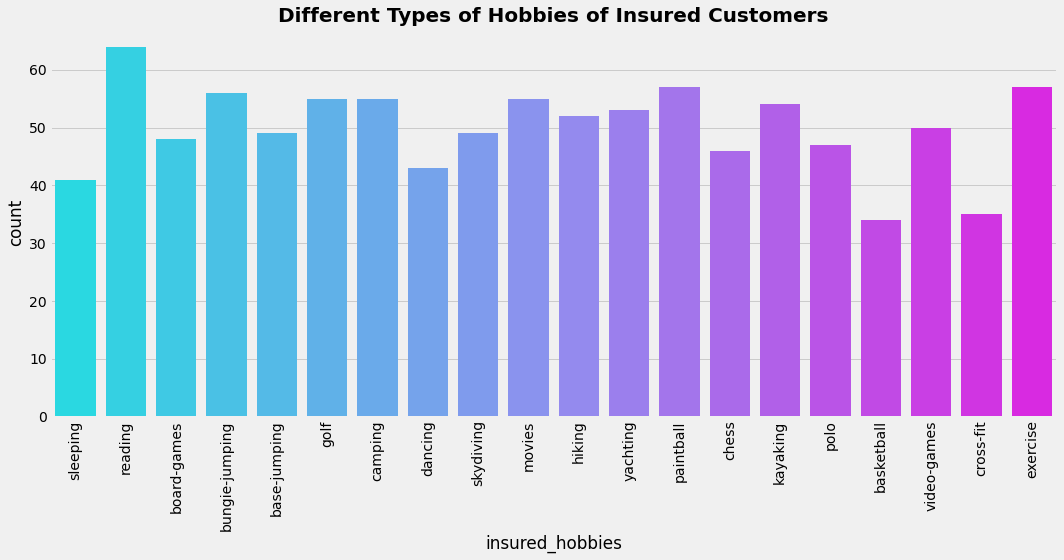

In [34]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers',fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show()

# Different Types of Incidents Vs Fraud cases

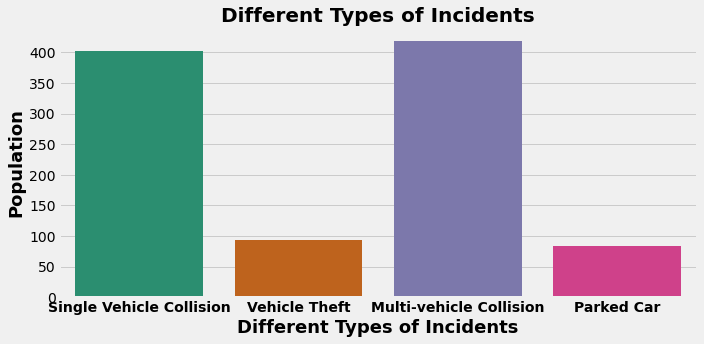

In [35]:
# let's check the incident types
plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(df['incident_type'], palette = 'Dark2')
plt.title('Different Types of Incidents',fontsize=20,fontweight ='bold')
plt.xlabel('Different Types of Incidents', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

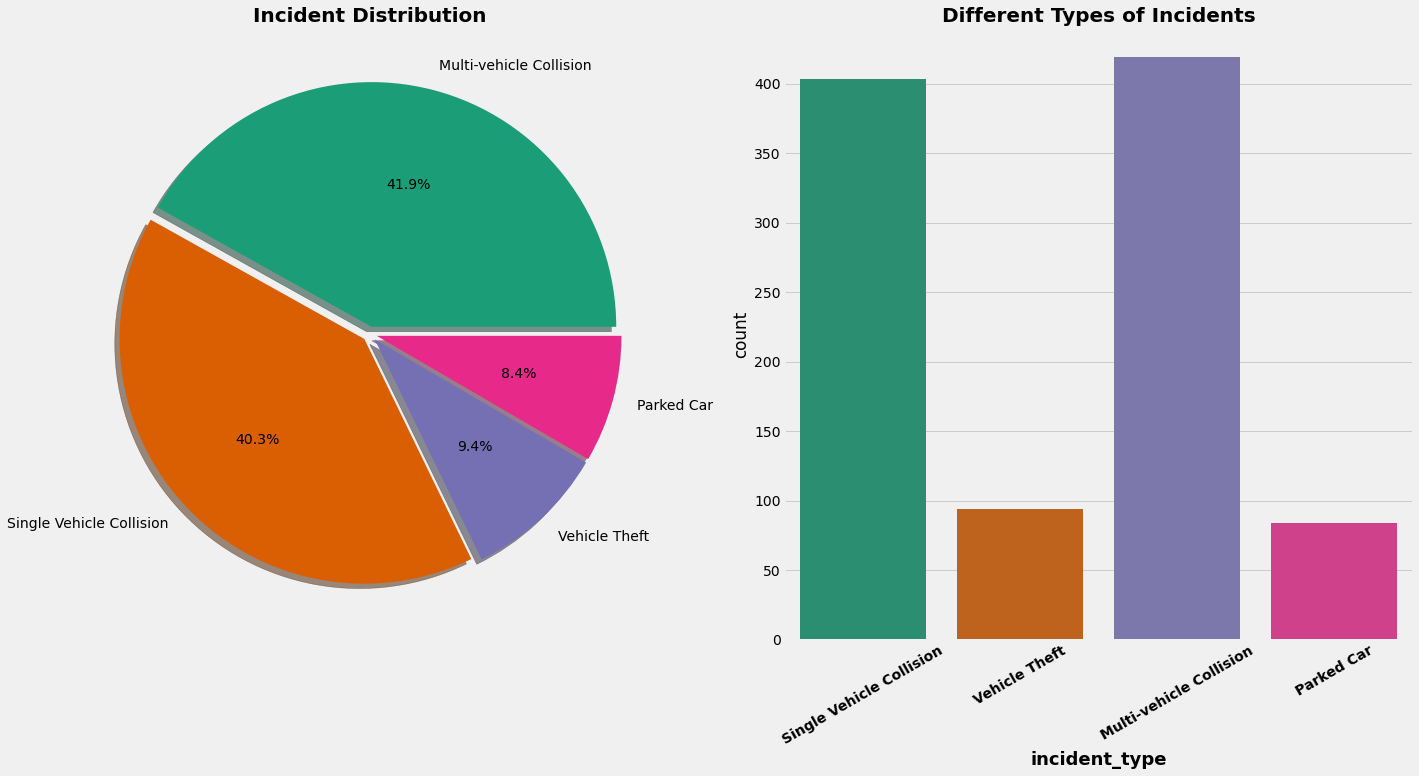

In [36]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Dark2')
f,ax=plt.subplots(1,2,figsize=(20,11))
df['incident_type'].value_counts().plot.pie(explode=[0.03,.03,.03,.03],autopct='%3.1f%%',
                                          textprops ={ 'fontsize':14}, ax=ax[0],shadow=True)
ax[0].set_title('Incident Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('incident_type',data=df,ax=ax[1])
ax[1].set_title('Different Types of Incidents',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("incident_type",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,rotation=30,fontweight ='bold')
plt.tight_layout()
plt.show()

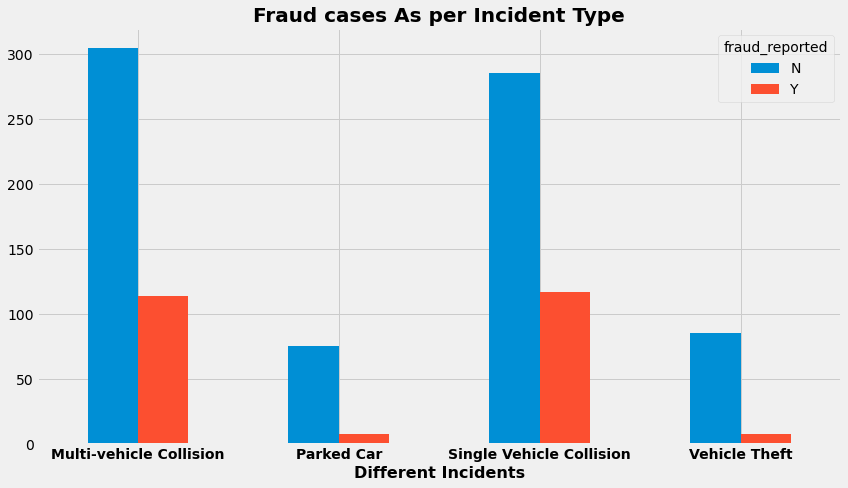

In [37]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,7)
table = pd.crosstab(df['incident_type'], df['fraud_reported'])
table.plot(kind = 'bar')
plt.title('Fraud cases As per Incident Type',fontsize=20,fontweight ='bold')
plt.xlabel('Different Incidents', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show()

-  Most of case comes from Multi-vehicle and single vehicle collision.

-  Some claims are due to automobile robbery.

-  One claim out of three claim is fraud in multi or single vehicle collision incident.

​

**It will be interesting to figure out collision type and severity for different incident and corresponding fraud claim.** 

# Exploration of different Collision

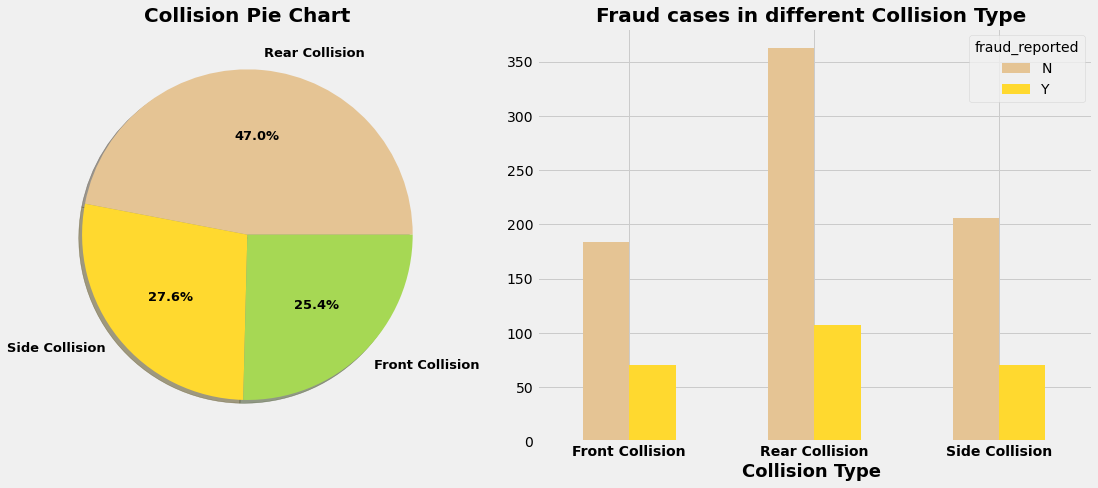

In [38]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['collision_type'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['collision_type'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases in different Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

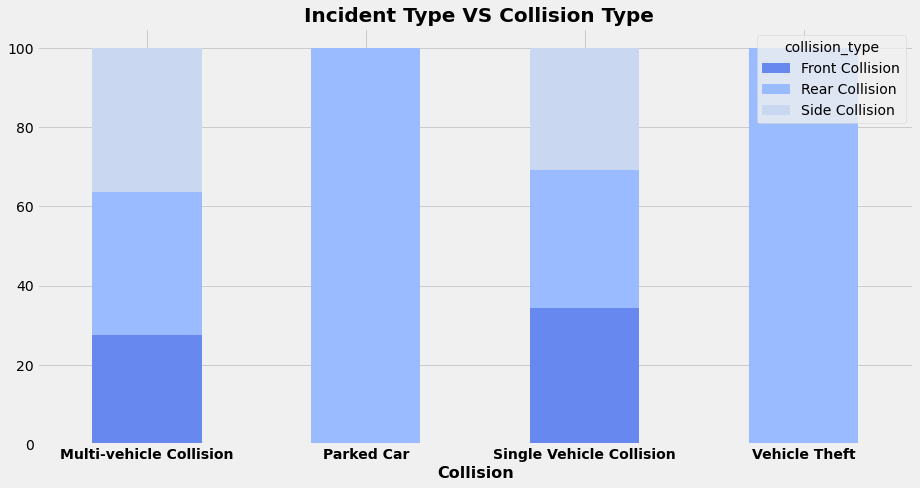

In [39]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('coolwarm')
table = pd.crosstab(df['incident_type'], df['collision_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True)
plt.title(' Incident Type VS Collision Type',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show()

# Collision VS Incident Severity

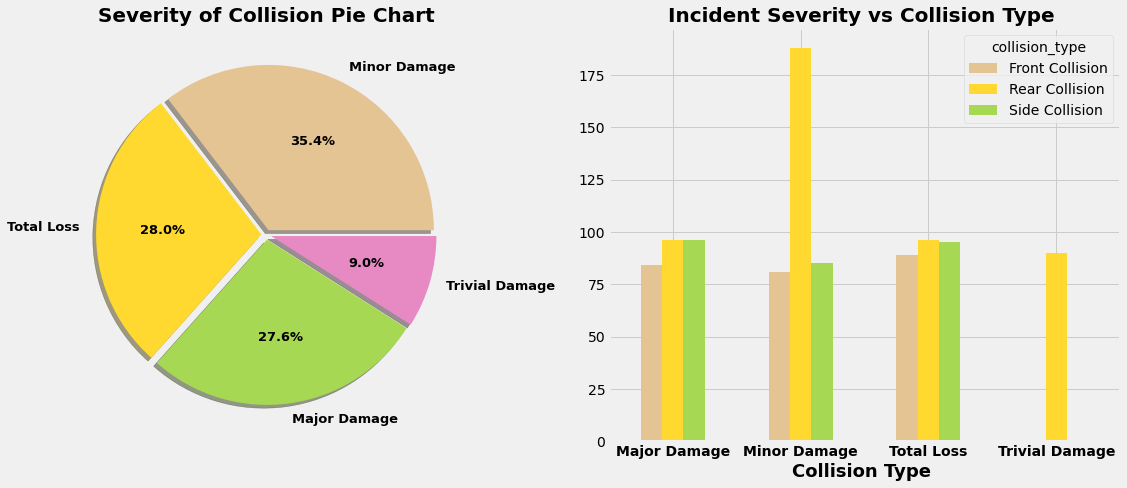

In [40]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['incident_severity'].value_counts().plot.pie(explode=[0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Severity of Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['incident_severity'], df['collision_type'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Incident Severity vs Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

Let check another plot of Incident Type VS Severity of collision to gain more insight.

In [41]:
pd.crosstab(df['incident_type'], df['incident_severity']).style.background_gradient(cmap='summer_r')

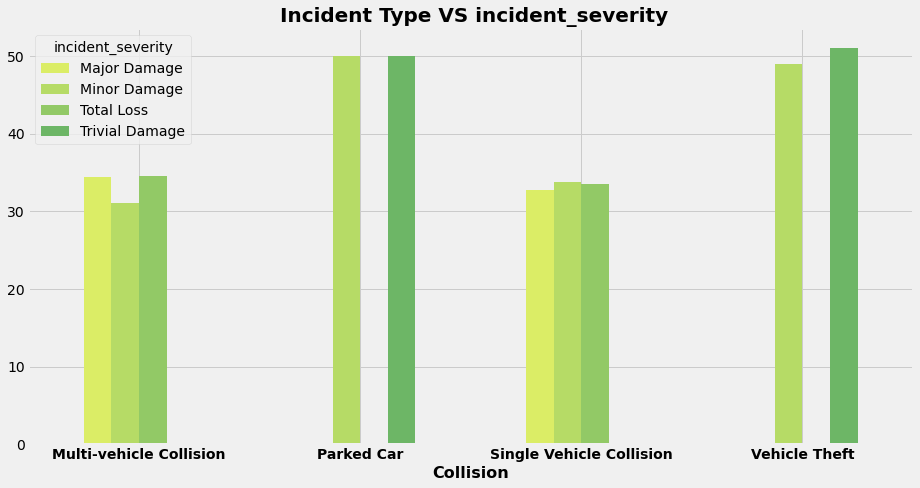

In [42]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('summer_r')
table = pd.crosstab(df['incident_type'], df['incident_severity'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar')
plt.title(' Incident Type VS incident_severity',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show()

**It seem like incident Type is important variable for us. Now is time to dive deep to get more insight on incident type by visualise incident type with Numerical features.**

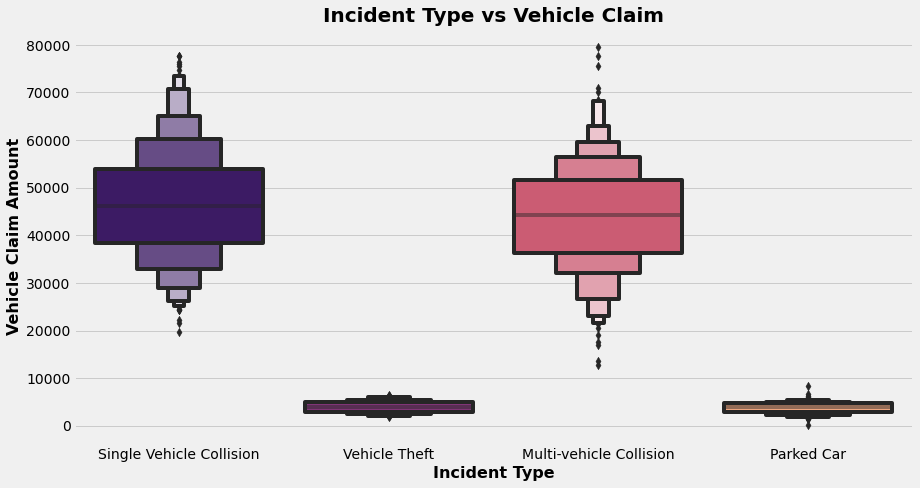

In [43]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.boxenplot(df['incident_type'], df['vehicle_claim'], palette = 'magma')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Type', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

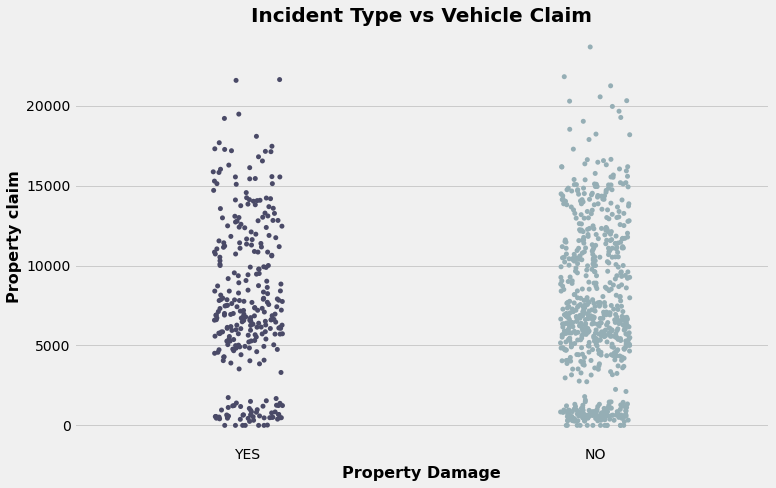

In [44]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.stripplot(df['property_damage'], df['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Property Damage', fontsize=16,fontweight='bold')
plt.ylabel('Property claim', fontsize=16,fontweight='bold')
plt.show()

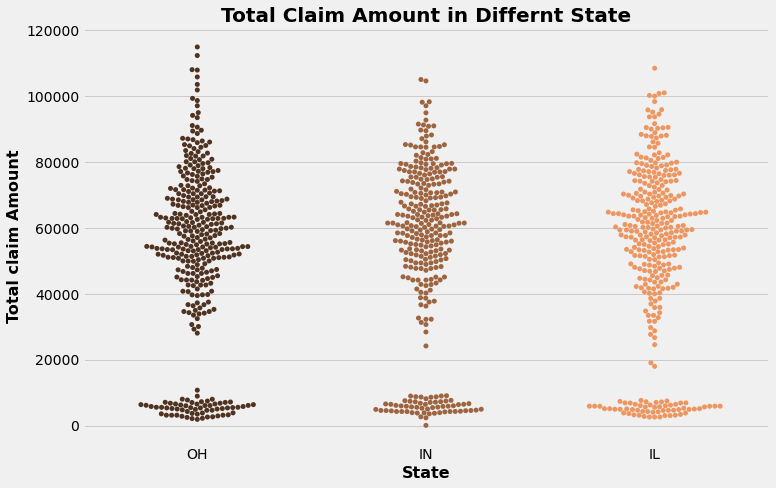

In [45]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.swarmplot(df['policy_state'], df['total_claim_amount'], palette = 'copper')
plt.title('Total Claim Amount in Differnt State',fontsize=20,fontweight ='bold')
plt.xlabel('State', fontsize=16,fontweight='bold')
plt.ylabel('Total claim Amount', fontsize=16,fontweight='bold')
plt.show()

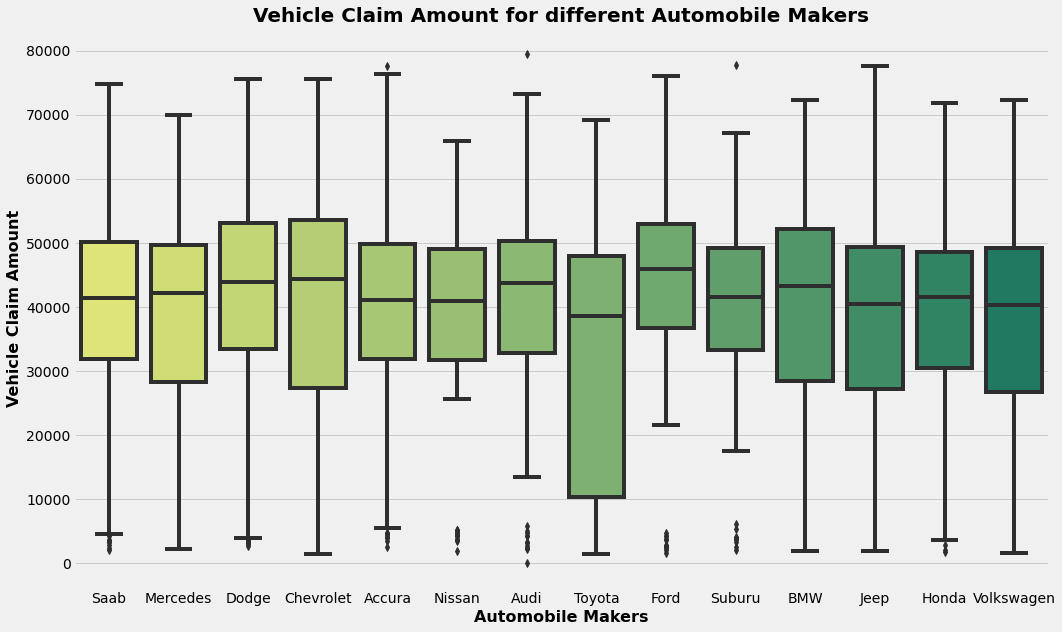

In [46]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.boxplot(df['auto_make'], df['vehicle_claim'], palette = 'summer_r')
plt.title('Vehicle Claim Amount for different Automobile Makers',fontsize=20,fontweight ='bold')
plt.xlabel('Automobile Makers', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

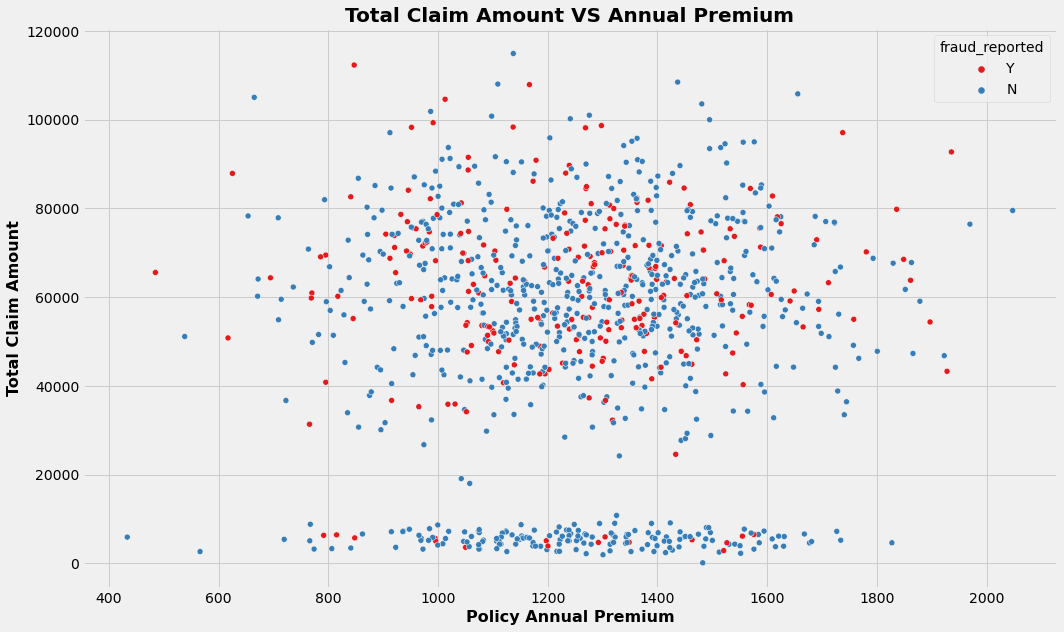

In [47]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.scatterplot(df['policy_annual_premium'], df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Total Claim Amount VS Annual Premium',fontsize=20,fontweight ='bold')
plt.xlabel('Policy Annual Premium', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

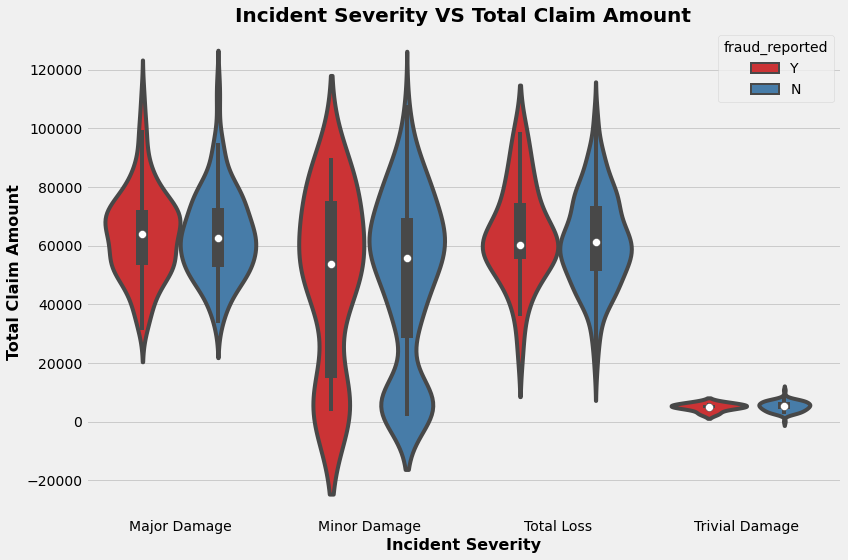

In [48]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,8)
sns.violinplot(df['incident_severity'], df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Incident Severity VS Total Claim Amount',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Severity', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

In [49]:
pd.set_option('display.max_columns', None)
df.head()

months_as_customer  age policy_state  policy_deductable  \
0                 328   48           OH               1000   
1                 228   42           IN               2000   
2                 134   29           OH               2000   
3                 256   41           IL               2000   
4                 228   44           IL               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   
2              sales     board-games            own-child          35100   
3       armed-forces     board-games            unmarried          48900   
4              sales     board-games            unmarried          66000   

   capital-loss             incident_type   collision_type incident_severity  \
0             0  Single Vehicle Collision   Side Collision      Major Damage   
1             0             Vehicle Theft   Rear Collision      Minor Damage   
2             0   Multi-vehicle Collision   Rear Collision      Minor Damage   
3        -62400  Single Vehicle Collision  Front Collision      Major Damage   
4        -46000             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                  None             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             650           4550     Accura        RSX   

  fraud_reported CSL_Personal CSL_Accidental  policy_bind_day  \
0              Y          250            500               17   
1              Y          250            500               27   
2              N          100            300                9   
3              Y          250            500               25   
4              N          500           1000                6   

   policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                 10              2014            25      

# Encoding Categorical Columns

In [50]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48           2.0               1000   
1                 228   42           1.0               2000   
2                 134   29           2.0               2000   
3                 256   41           0.0               2000   
4                 228   44           0.0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0          1.0   
1                1197.22         5000000          1.0   
2                1413.14         5000000          0.0   
3                1415.74         6000000          0.0   
4                1583.91         6000000          1.0   

   insured_education_level  insured_occupation  insured_hobbies  \
0                      4.0                 2.0             17.0   
1                      4.0                 6.0             15.0   
2                      6.0                11.0              2.0   
3                      6.0                 1.0              2.0   
4                      0.0                11.0              2.0   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                   0.0          53300             0            2.0   
1                   2.0              0             0            3.0   
2                   3.0          35100             0            0.0   
3                   4.0          48900        -62400            2.0   
4                   4.0          66000        -46000            3.0   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0             2.0                0.0                    4.0             4.0   
1             1.0                1.0                    4.0             5.0   
2             1.0                1.0                    4.0             1.0   
3             0.0                0.0                    4.0             2.0   
4             1.0                1.0                    2.0             1.0   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0            1.0                         5                            1   
1            5.0                         8                            1   
2            1.0                         7                            3   
3            0.0                         5                            1   
4            0.0                        20                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0              1.0                1          2                      1.0   
1              0.0                0          0                      0.0   
2              0.0                2          3                      0.0   
3              0.0                1          2                      0.0   
4              0.0                0          1                      0.0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080       10.0   
1                5070           780             780           3510        8.0   
2               34650          7700            3850          23100        4.0   
3               63400          6340            6340          50720        3.0   
4                6500          1300             650           4550        0.0   

   auto_model  fraud_reported  CSL_Personal  CSL_Accidental  policy_bind_day  \
0         1.0             1.0           1.0             2.0               17   
1        12.0             1.0           1.0             2.0               27   
2        30.0             0.0           0.0             1.0                9   
3        34.0             1.0           1.0             2.0               25   
4        31.0             0.0           2.0             0.0                6   

   policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                 10              

In [51]:
df.dtypes

months_as_customer                int64
age                               int64
policy_state                    float64
policy_deductable                 int64
policy_annual_premium           float64
umbrella_limit                    int64
insured_sex                     float64
insured_education_level         float64
insured_occupation              float64
insured_hobbies                 float64
insured_relationship            float64
capital-gains                     int64
capital-loss                      int64
incident_type                   float64
collision_type                  float64
incident_severity               float64
authorities_contacted           float64
incident_state                  float64
incident_city                   float64
incident_hour_of_the_day          int64
number_of_vehicles_involved       int64
property_damage                 float64
bodily_injuries                   int64
witnesses                         int64
police_report_available         float64


# Feature selection and Engineering

**1. Outliers Detection and Removal**

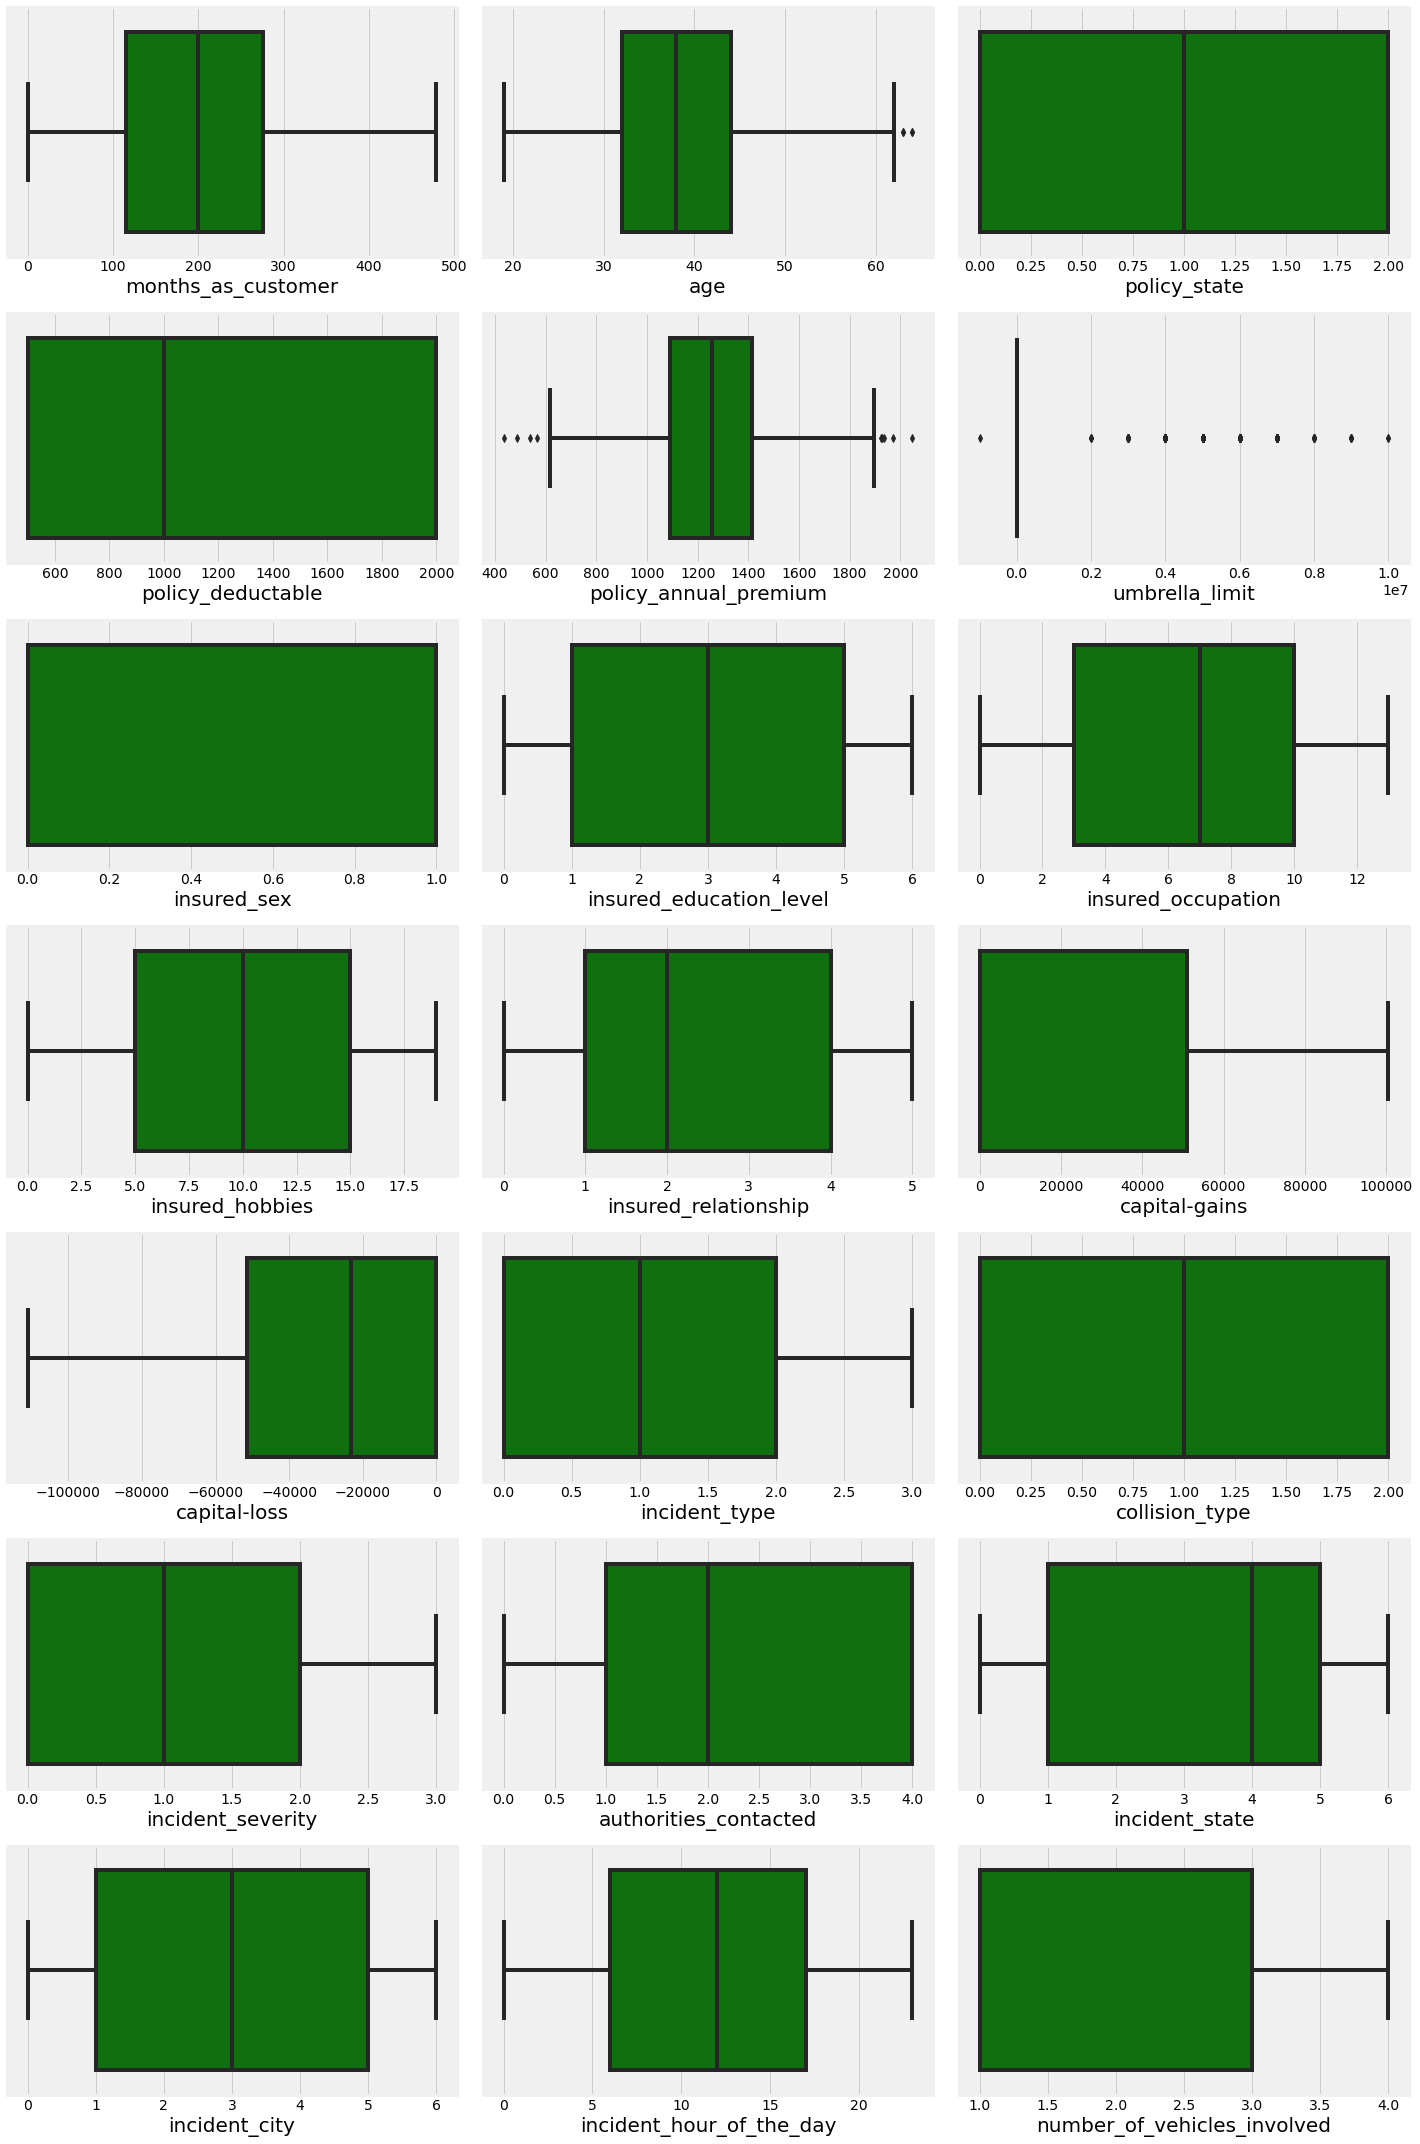

In [52]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for columns in df:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[columns],color='g')
        plt.xlabel(columns,fontsize=20)
    plotnumber+=1
plt.show()

**From Boxplot we can see outliers exist dataset.**

# Outliers removal using Zscore method

In [53]:
from scipy.stats import zscore
out_features=df[['policy_annual_premium','umbrella_limit','age']]
z = np.abs(zscore(out_features))
z

policy_annual_premium  umbrella_limit       age
0                 0.616705        0.479476  0.990836
1                 0.242521        1.697980  0.334073
2                 0.642233        1.697980  1.088913
3                 0.652886        2.133471  0.224613
4                 1.341980        2.133471  0.552994
..                     ...             ...       ...
995               0.222884        0.479476  0.103769
996               0.739141        0.479476  0.224613
997               0.520739        0.826998  0.541611
998               0.411866        1.697980  2.523284
999               2.008710        0.479476  2.304363

[1000 rows x 3 columns]

In [55]:
# threshold=3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 503, 657,
        700, 763, 875, 922, 975], dtype=int64),
 array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64))

In [56]:
z.iloc[875,1]

3.0044538458871766

In [57]:
df1=df[(z<3).all(axis=1)]
df1.shape

(982, 41)

In [58]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (1000, 41)
Shape of the dataframe after removing outliers:  (982, 41)
Percentage of data loss post outlier removal:  1.7999999999999998


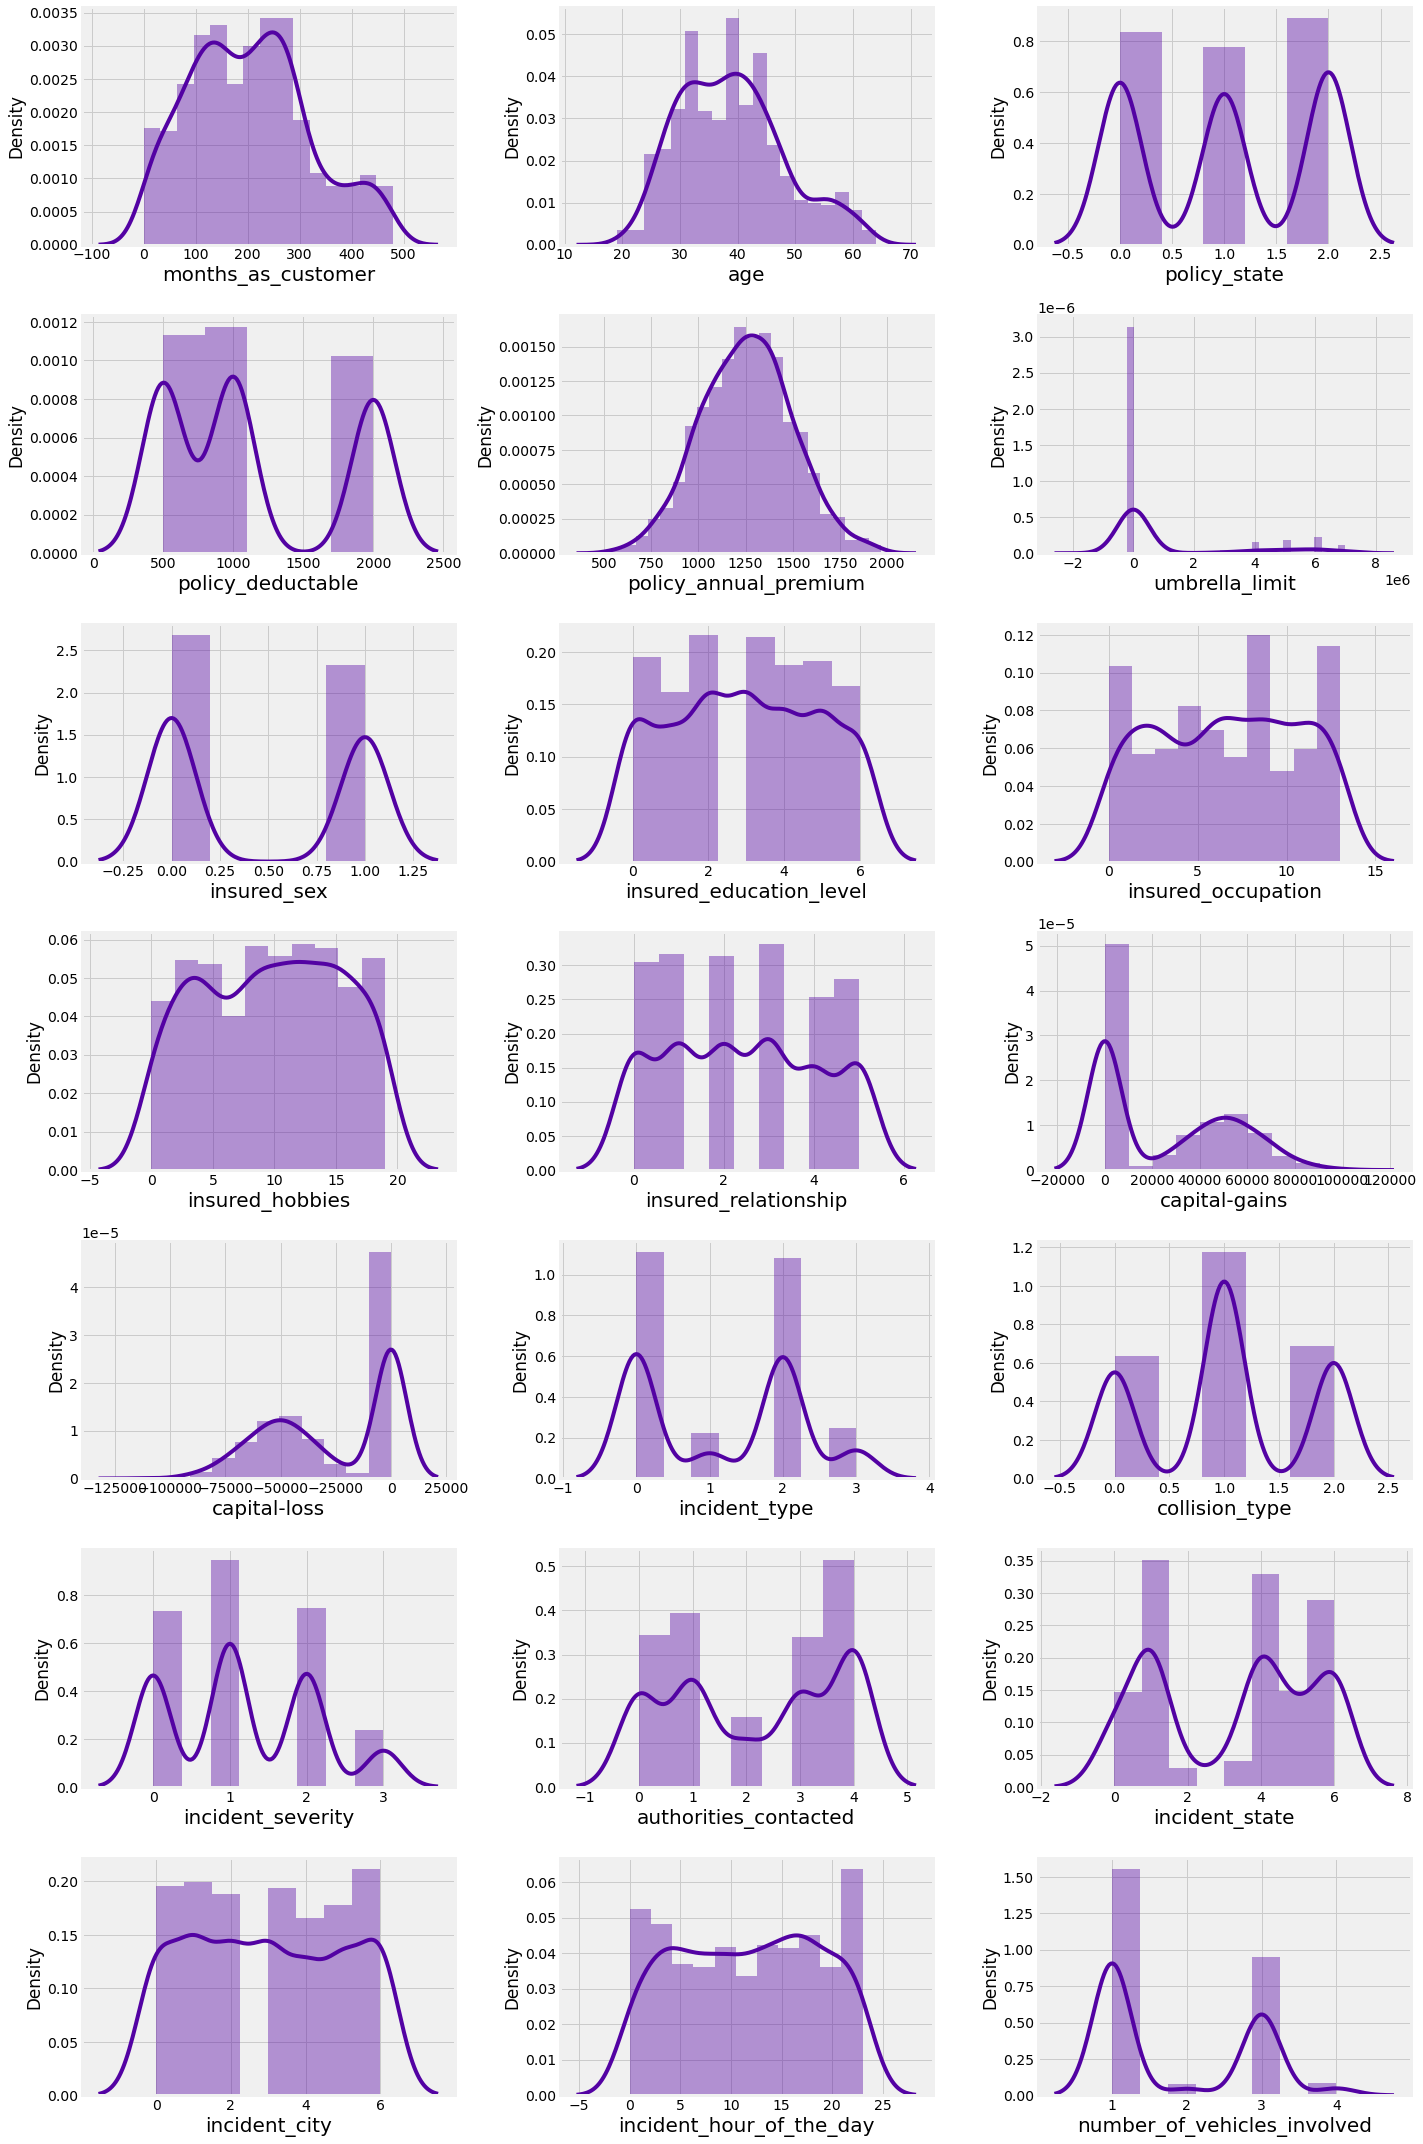

In [59]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for column in df:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnum+=1
plt.show()

-  Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.

**We also going to ignore sknewness in target feature.**

In [60]:
df[numerical_col].skew()

months_as_customer             0.361529
age                            0.477342
policy_deductable              0.474918
policy_annual_premium          0.035129
umbrella_limit                 1.804706
capital-gains                  0.463530
capital-loss                  -0.392157
incident_hour_of_the_day      -0.039501
number_of_vehicles_involved    0.508672
bodily_injuries                0.000000
witnesses                      0.022923
total_claim_amount            -0.595772
injury_claim                   0.269289
property_claim                 0.381898
vehicle_claim                 -0.624059
policy_bind_day                0.024596
policy_bind_month             -0.023759
policy_bind_year               0.061369
incident_day                   0.059271
incident_month                 1.391291
Automobile_Age                 0.053015
dtype: float64

-  Out above features 'umbrella_limit','total_claim_amount' and 'vehicle_claim' are continous variable with skew data. The variable 'incident_month' is skewed but it is discrete in nature.So ignore it.

-  We will use yeo-johnson method to transform negatively skewed data.

In [61]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['total_claim_amount','vehicle_claim']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

**Checking Skewness after transformation**

In [62]:
df[skew].skew()

total_claim_amount   -0.509096
vehicle_claim        -0.522592
dtype: float64

**For 'total_claim_amount','vehicle_claim' skewness has not been removed but it got reduced.**

# Corrleation

In [63]:
df.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922895     -0.009280   
age                                    0.922895  1.000000     -0.021288   
policy_state                          -0.009280 -0.021288      1.000000   
policy_deductable                      0.032585  0.032968      0.016283   
policy_annual_premium                 -0.000872  0.007122      0.013045   
umbrella_limit                         0.019096  0.013813     -0.011460   
insured_sex                            0.061321  0.074811     -0.019069   
insured_education_level               -0.000771  0.001621     -0.027129   
insured_occupation                     0.008846  0.015963     -0.026722   
insured_hobbies                       -0.090139 -0.079611     -0.038761   
insured_relationship                   0.071636  0.076220     -0.017362   
capital-gains                          0.005387 -0.005792      0.069504   
capital-loss                           0.021668  0.012056     -0.030520   
incident_type                         -0.017894 -0.026972      0.033264   
collision_type                        -0.075257 -0.077693      0.051496   
incident_severity                     -0.063606 -0.064117     -0.028561   
authorities_contacted                  0.011815  0.017224     -0.013136   
incident_state                         0.015315  0.012352      0.019880   
incident_city                         -0.007719 -0.007384     -0.002242   
incident_hour_of_the_day               0.065402  0.083197      0.022493   
number_of_vehicles_involved            0.013086  0.021143     -0.046451   
property_damage                        0.000666 -0.007428     -0.014337   
bodily_injuries                       -0.010049 -0.013715      0.013510   
witnesses                              0.060682  0.054565      0.027373   
police_report_available               -0.019683 -0.019656      0.066969   
total_claim_amount                     0.056667  0.066779     -0.013460   
injury_claim                           0.064592  0.076851     -0.048041   
property_claim                         0.030136  0.058094     -0.002342   
vehicle_claim                          0.054468  0.057962     -0.005294   
auto_make                              0.050084  0.034008      0.010108   
auto_model                             0.007150  0.016555     -0.019146   
fraud_reported                         0.022359  0.013957      0.033881   
CSL_Personal                          -0.024163 -0.014759      0.003222   
CSL_Accidental                         0.009256  0.012555      0.027338   
policy_bind_day                        0.048699  0.051813      0.000543   
policy_bind_month                      0.004998  0.014972      0.073080   
policy_bind_year                      -0.043042 -0.032428     -0.002343   
incident_day                          -0.008251 -0.004434      0.014651   
incident_month                         0.020590  0.019061      0.026989   
Automobile_Age                        -0.001776 -0.006154      0.001539   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.032585              -0.000872   
age                                   0.032968               0.007122   
policy_state                          0.016283               0.013045   
policy_deductable                     1.000000              -0.005968   
policy_annual_premium                -0.005968               1.000000   
umbrella_limit                        0.013272              -0.013467   
insured_sex                          -0.007310               0.042441   
insured_education_level               0.014087              -0.021396   
insured_occupation                   -0.051319               0.030036   
insured_hobbies                      -0.003221              -0.015356   
insured_relationship                 -0.017344               0.005188   
capital-gains                         0.033381              -0.007655   
capi

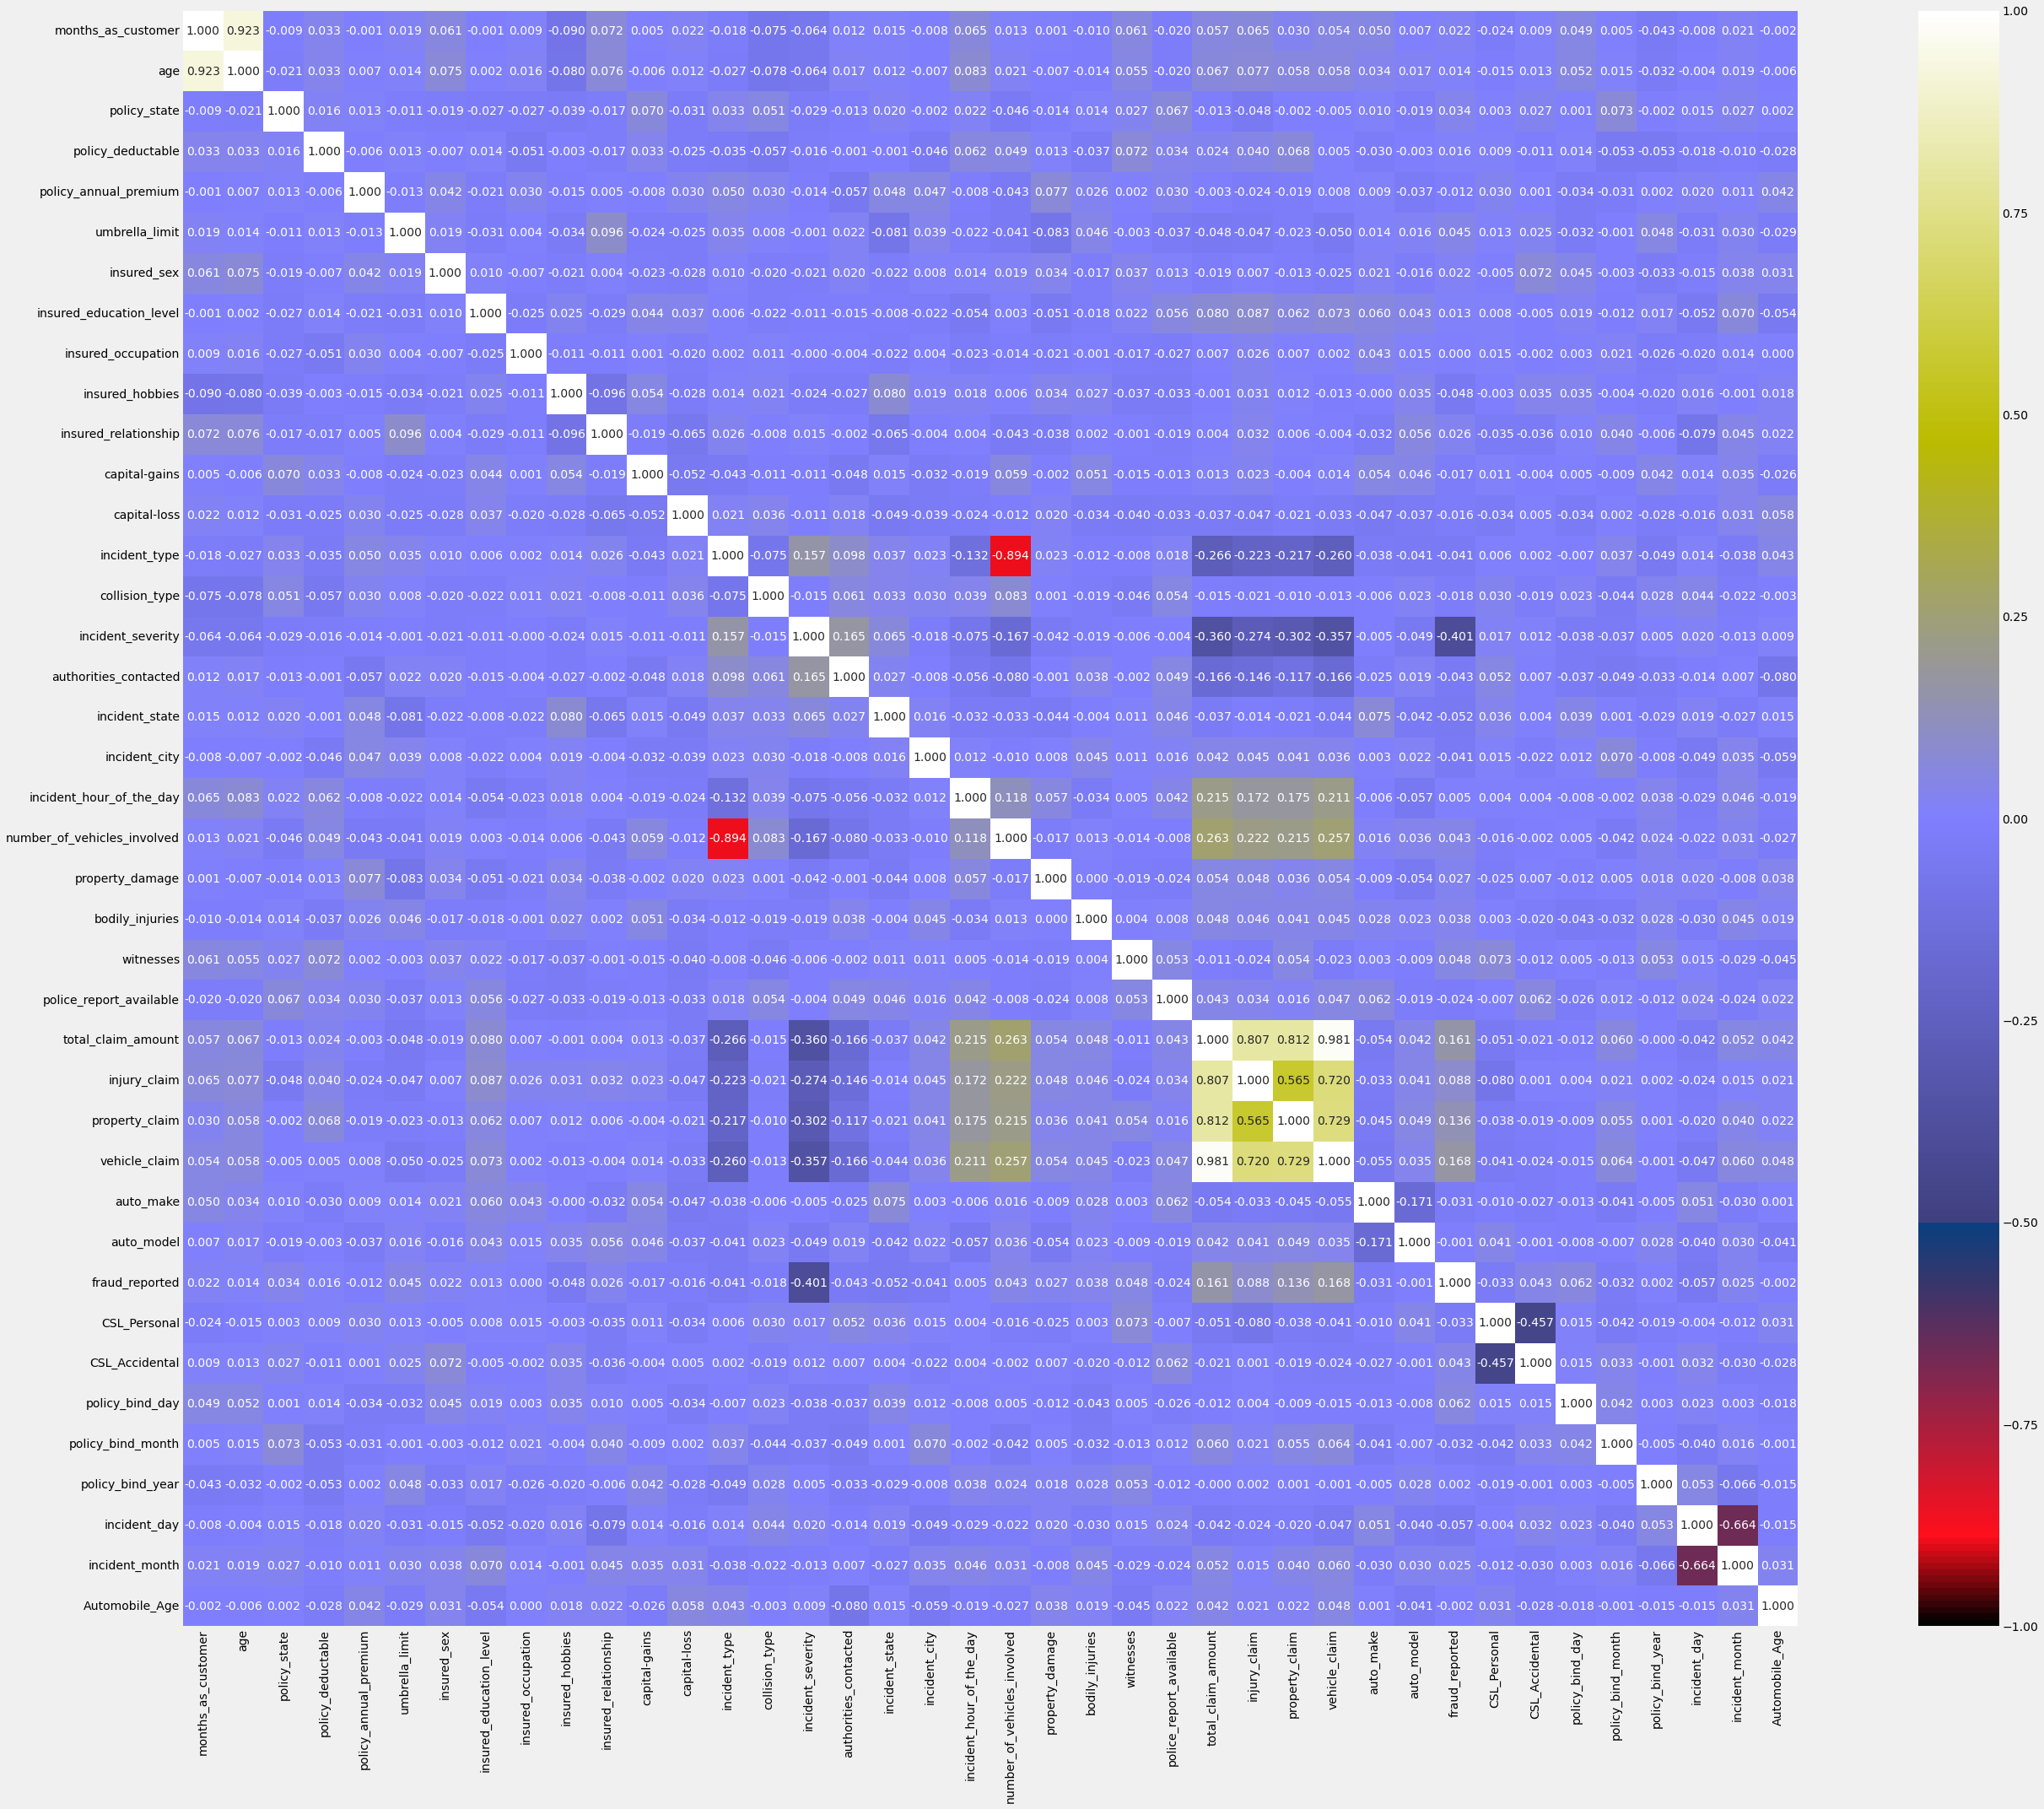

In [64]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()

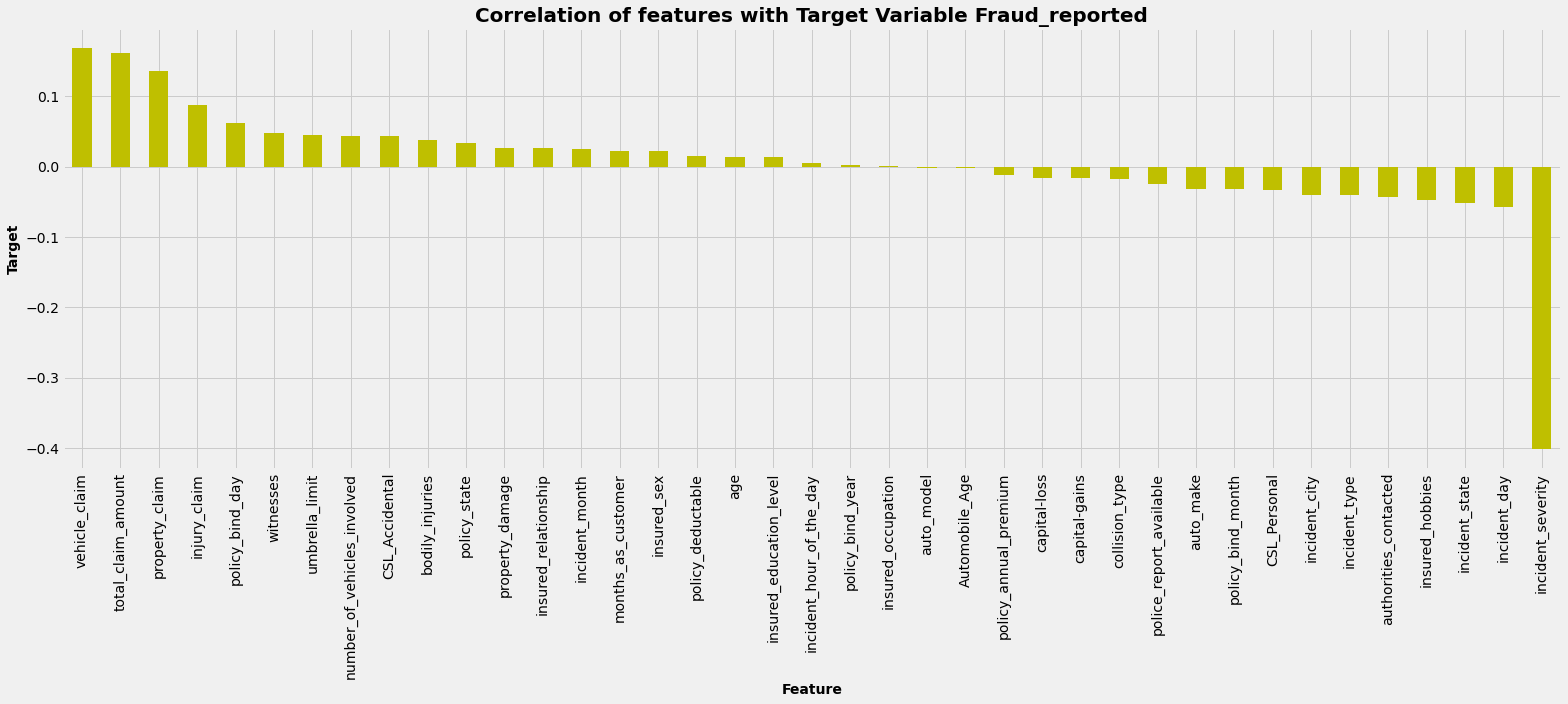

In [65]:
plt.figure(figsize=(22,10))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14,fontweight='bold')
plt.ylabel('Target',fontsize=14,fontweight='bold')
plt.title('Correlation of features with Target Variable Fraud_reported',fontsize=20,fontweight='bold')
plt.show()

-  incident_severity is correlated with target variable with correlation of 0.4. Other variable are poorly correlated with target variable.
-  Other variable are poorly correlated with target variable.
-  injury_claim,property_claim,vehicle_claim are highly correlated with each other.
-  incident_hour_of_the_day is highly negative correlated with incident type.

# Balancing Imbalanced target feature

In [77]:
df1.fraud_reported.value_counts()

0.0    742
1.0    240
Name: fraud_reported, dtype: int64

**As Target variable data is Imbalanced in nature we will need to balance target variable.**

# Balancing using SMOTE

In [70]:
from sklearn.preprocessing import StandardScaler

In [84]:
# Splitting data in target and dependent feature
X = df1.drop(["fraud_reported"], axis =1)
Y = df1['fraud_reported']

In [87]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

ValueError: could not convert string to float: '41-50'

In [90]:
df.corr().fraud_reported.sort_values()

incident_severity             -0.401433
incident_day                  -0.056947
incident_state                -0.051578
insured_hobbies               -0.048204
authorities_contacted         -0.043422
incident_type                 -0.040652
incident_city                 -0.040519
CSL_Personal                  -0.033267
policy_bind_month             -0.032403
auto_make                     -0.031281
police_report_available       -0.024288
collision_type                -0.017518
capital-gains                 -0.016661
capital-loss                  -0.016330
policy_annual_premium         -0.011914
Automobile_Age                -0.002331
auto_model                    -0.001441
insured_occupation             0.000463
policy_bind_year               0.002461
incident_hour_of_the_day       0.004932
insured_education_level        0.013088
age                            0.013957
policy_deductable              0.015530
insured_sex                    0.021638
months_as_customer             0.022359


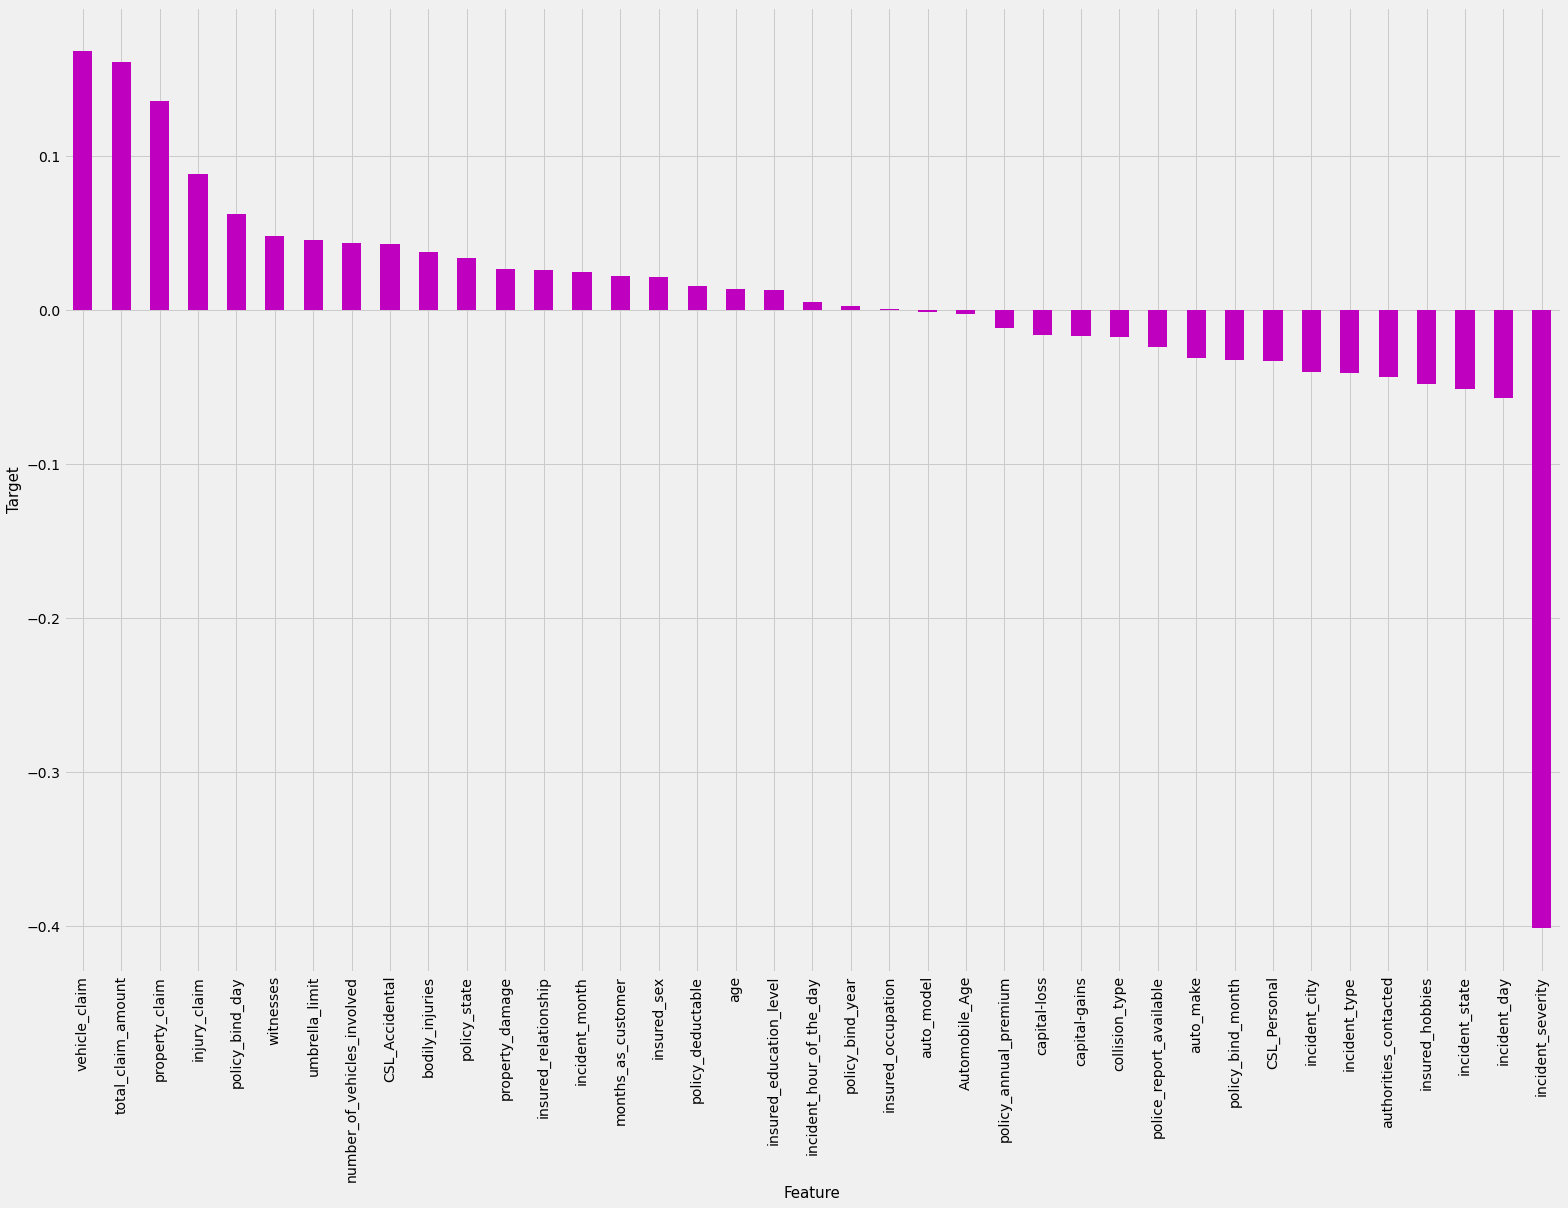

In [91]:
plt.figure(figsize=(22,17))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.show()

In [82]:
Y.value_counts()

0.0    742
1.0    240
Name: fraud_reported, dtype: int64

In [73]:
from imblearn.over_sampling import SMOTE

In [96]:
X=df.iloc[:,:-1] #creating inependent variable
Y=df.iloc[:,-1]  #creating target variable
#code for undersampling
from imblearn.under_sampling import NearMiss
nm=NearMiss()
#Resampling of data of independent variable xand target variable y x_res,y_res=nm.fit_sample(x,y)
print(X.shape)
print(Y.shape)

(982, 40)
(982,)


In [99]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Checking Multicollinearity between features using variance_inflation_factor

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values                     Features
0       6.912210           months_as_customer
1       6.922607                          age
2       1.039553                 policy_state
3       1.048866            policy_deductable
4       1.038561        policy_annual_premium
5       1.047116               umbrella_limit
6       1.038561                  insured_sex
7       1.050478      insured_education_level
8       1.017712           insured_occupation
9       1.055247              insured_hobbies
10      1.059439         insured_relationship
11      1.040049                capital-gains
12      1.042485                 capital-loss
13      5.194807                incident_type
14      1.048563               collision_type
15      1.440678            incident_severity
16      1.108361        authorities_contacted
17      1.053867               incident_state
18      1.035688                incident_city
19      1.101885     incident_hour_of_the_day
20      5.166690  number_of_vehicles_involved
21      1.038552              property_damage
22      1.030861              bodily_injuries
23      1.049183                    witnesses
24      1.047821      police_report_available
25  42554.273878           total_claim_amount
26   1578.288498                 injury_claim
27   1542.114840               property_claim
28  21125.167916                vehicle_claim
29      1.083202                    auto_make
30      1.069160                   auto_model
31      1.242458               fraud_reported
32      1.315988                 CSL_Personal
33      1.305769               CSL_Accidental
34      1.028035              policy_bind_day
35      1.043960            policy_bind_month
36      1.034322             policy_bind_year
37      1.834890                 incident_day
38      1.840429               incident_month
39      1.042200               Automobile_Age

-  Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
-  Another way to address Multicollinerity is to Scaled Data and then apply PCA.

**We will go by Second way for further investigation. As For some Independent feature VIF is exceed permissible limit of 10.**

# PCA

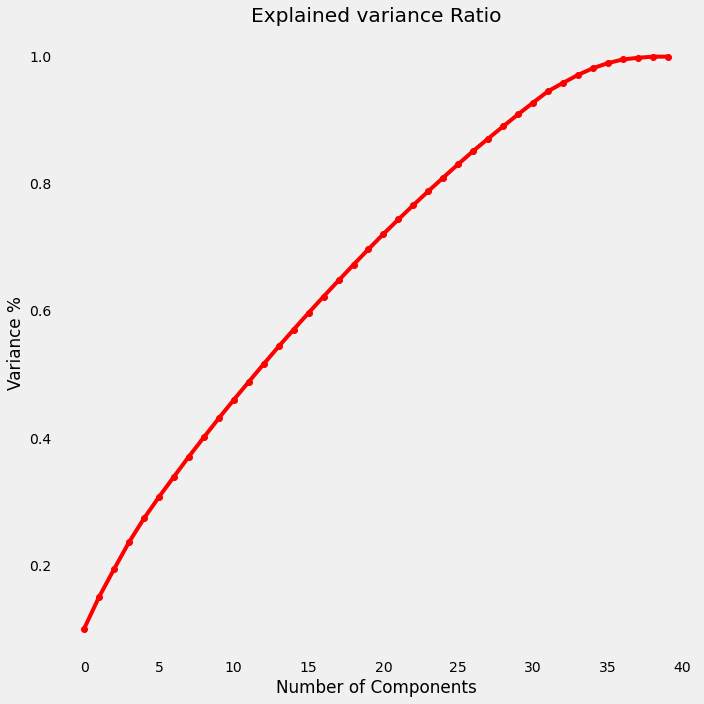

In [101]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

**AS per the graph, we can see that 28 principal components attribute for 90% of variation in the data. We shall pick the first 28 components for our prediction.**

In [102]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(X_scale)

In [103]:
principle_x=pd.DataFrame(x_new,columns=np.arange(28))

# Machine Learning Model Building

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (687, 28)
Training target vector size: (687,)
Test feature matrix size: (295, 28)
Test target vector size: (295,)


# Finding best Random state

In [106]:
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8508474576271187 on Random_state 199


In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=9, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7898305084745763


Confusion matrix of Logistics Regression : 
 [[  0   0   0   0   0   0]
 [  0  41  16   0   0   0]
 [  1  11 100   8   0   0]
 [  0   0  13  73   1   0]
 [  0   0   0   2  19   5]
 [  0   0   0   0   5   0]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

       11-20       0.00      0.00      0.00         0
       21-30       0.79      0.72      0.75        57
       31-40       0.78      0.83      0.80       120
       41-50       0.88      0.84      0.86        87
       51-60       0.76      0.73      0.75        26
       61-70       0.00      0.00      0.00         5

    accuracy                           0.79       295
   macro avg       0.53      0.52      0.53       295
weighted avg       0.79      0.79      0.79       295



In [116]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7898305084745763


Confusion matrix : 
 [[  0   0   0   0   0   0]
 [  0  41  16   0   0   0]
 [  1  11 100   8   0   0]
 [  0   0  13  73   1   0]
 [  0   0   0   2  19   5]
 [  0   0   0   0   5   0]]


Classification Report : 
               precision    recall  f1-score   support

       11-20       0.00      0.00      0.00         0
       21-30       0.79      0.72      0.75        57
       31-40       0.78      0.83      0.80       120
       41-50       0.88      0.84      0.86        87
       51-60       0.76      0.73      0.75        26
       61-70       0.00      0.00      0.00         5

    accuracy                           0.79       295
   macro avg       0.53      0.52      0.53       295
weighted avg       0.79      0.79      0.79       295



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.7627118644067796


Confusion matrix : 
 [[ 32  25   0  

In [118]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.76649746 0.78172589 0.80612245 0.78061224 0.84183673]
Mean Score : 0.7953589557650471
Std deviation : 0.02650414517019782




Cross Validation Score SVC() :

Score : [0.72588832 0.72081218 0.78571429 0.76530612 0.75      ]
Mean Score : 0.7495441831554956
Std deviation : 0.02425716511585564




Cross Validation Score GaussianNB() :

Score : [0.70558376 0.69543147 0.74489796 0.73979592 0.78571429]
Mean Score : 0.7342846783383404
Std deviation : 0.03200417026426154




Cross Validation Score DecisionTreeClassifier() :

Score : [0.73096447 0.68020305 0.70918367 0.65816327 0.71938776]
Mean Score : 0.6995804413135812
Std deviation : 0.02668473251027929




Cross Validation Score RandomForestClassifier() :

Score : [0.71573604 0.71573604 0.75510204 0.75       0.76530612]
Mean Score : 0.740376048896716
Std deviation : 0.020713492496438255




Cross Validation Score ExtraTreesClassifier() :

Score : [0.73096447 0.70558376 0.78571429 0.

# Hyper Parameter Tuning : GridSearchCV

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [121]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 1/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 2/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 3/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 4/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split

[CV 4/5; 8/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 5/5; 8/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400
[CV 5/5; 8/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 1/5; 9/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100
[CV 1/5; 9/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 9/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100
[CV 2/5; 9/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5; 9/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100
[CV 3/5; 9/2

[CV 1/5; 17/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.630 total time=   0.5s
[CV 2/5; 17/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 2/5; 17/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.681 total time=   0.8s
[CV 3/5; 17/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 3/5; 17/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.679 total time=   0.8s
[CV 4/5; 17/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 4/5; 17/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.657 total time=   0.7s
[CV 5/5; 17/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=

[CV 4/5; 23/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=0.715 total time=   1.2s
[CV 5/5; 23/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=300
[CV 5/5; 23/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=0.693 total time=   1.2s
[CV 1/5; 24/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 1/5; 24/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.638 total time=   2.1s
[CV 2/5; 24/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 2/5; 24/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.703 total time=   2.4s
[CV 3/5; 24/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=

[CV 2/5; 30/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.688 total time=   0.6s
[CV 3/5; 30/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=200
[CV 3/5; 30/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.701 total time=   0.8s
[CV 4/5; 30/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=200
[CV 4/5; 30/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.693 total time=   1.1s
[CV 5/5; 30/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=200
[CV 5/5; 30/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.701 total time=   0.6s
[CV 1/5; 31/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_est

[CV 5/5; 36/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=400;, score=0.679 total time=   1.5s
[CV 1/5; 37/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=100
[CV 1/5; 37/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.587 total time=   0.3s
[CV 2/5; 37/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=100
[CV 2/5; 37/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.652 total time=   0.6s
[CV 3/5; 37/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=100
[CV 3/5; 37/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.642 total time=   0.4s
[CV 4/5; 37/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=

[CV 3/5; 43/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.620 total time=   1.0s
[CV 4/5; 43/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=300
[CV 4/5; 43/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.642 total time=   1.0s
[CV 5/5; 43/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=300
[CV 5/5; 43/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.650 total time=   1.1s
[CV 1/5; 44/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=400
[CV 1/5; 44/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.587 total time=   1.4s
[CV 2/5; 44/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=

[CV 3/5; 56/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 4/5; 56/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=400
[CV 4/5; 56/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 5/5; 56/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=400
[CV 5/5; 56/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 1/5; 57/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=100
[CV 1/5; 57/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 57/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=100
[CV 

[CV 3/5; 63/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5; 63/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=300
[CV 4/5; 63/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5; 63/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=300
[CV 5/5; 63/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5; 64/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=400
[CV 1/5; 64/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 2/5; 64/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=

[CV 1/5; 70/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.688 total time=   1.0s
[CV 2/5; 70/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=200
[CV 2/5; 70/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.754 total time=   1.1s
[CV 3/5; 70/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=200
[CV 3/5; 70/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.737 total time=   1.0s
[CV 4/5; 70/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=200
[CV 4/5; 70/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.737 total time=   1.1s
[CV 5/5; 70/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=

[CV 4/5; 76/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.737 total time=   1.9s
[CV 5/5; 76/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 5/5; 76/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.737 total time=   2.0s
[CV 1/5; 77/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=100
[CV 1/5; 77/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=100;, score=0.659 total time=   0.4s
[CV 2/5; 77/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=100
[CV 2/5; 77/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=100;, score=0.732 total time=   0.4s
[CV 3/5; 77/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estima

[CV 2/5; 83/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=300;, score=0.732 total time=   1.7s
[CV 3/5; 83/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=300
[CV 3/5; 83/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=300;, score=0.679 total time=   1.7s
[CV 4/5; 83/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=300
[CV 4/5; 83/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=300;, score=0.715 total time=   1.7s
[CV 5/5; 83/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=300
[CV 5/5; 83/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=300;, score=0.664 total time=   1.7s
[CV 1/5; 84/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=

[CV 5/5; 89/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.650 total time=   0.4s
[CV 1/5; 90/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=200
[CV 1/5; 90/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.616 total time=   0.8s
[CV 2/5; 90/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=200
[CV 2/5; 90/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.754 total time=   0.8s
[CV 3/5; 90/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=200
[CV 3/5; 90/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.664 total time=   0.8s
[CV 4/5; 90/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=

[CV 3/5; 96/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=400;, score=0.657 total time=   1.6s
[CV 4/5; 96/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=400
[CV 4/5; 96/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=400;, score=0.708 total time=   1.6s
[CV 5/5; 96/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=400
[CV 5/5; 96/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=400;, score=0.693 total time=   1.8s
[CV 1/5; 97/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=100
[CV 1/5; 97/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 97/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimato

[CV 3/5; 104/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 4/5; 104/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400
[CV 4/5; 104/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 5/5; 104/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400
[CV 5/5; 104/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 1/5; 105/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100
[CV 1/5; 105/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 105/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=

[CV 1/5; 112/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 2/5; 112/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=400
[CV 2/5; 112/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 3/5; 112/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=400
[CV 3/5; 112/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 4/5; 112/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=400
[CV 4/5; 112/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 5/5; 112/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=11, n_est

[CV 4/5; 118/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.715 total time=   1.1s
[CV 5/5; 118/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=200
[CV 5/5; 118/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.679 total time=   1.1s
[CV 1/5; 119/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=300
[CV 1/5; 119/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=0.681 total time=   1.6s
[CV 2/5; 119/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=300
[CV 2/5; 119/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=0.739 total time=   1.6s
[CV 3/5; 119/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_est

[CV 2/5; 125/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=100;, score=0.725 total time=   0.5s
[CV 3/5; 125/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=100
[CV 3/5; 125/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=100;, score=0.745 total time=   0.4s
[CV 4/5; 125/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=100
[CV 4/5; 125/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=100;, score=0.715 total time=   0.6s
[CV 5/5; 125/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=100
[CV 5/5; 125/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=100;, score=0.701 total time=   0.8s
[CV 1/5; 126/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=1

[CV 5/5; 131/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=300;, score=0.686 total time=   1.7s
[CV 1/5; 132/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=400
[CV 1/5; 132/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=400;, score=0.645 total time=   2.4s
[CV 2/5; 132/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=400
[CV 2/5; 132/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=400;, score=0.696 total time=   2.4s
[CV 3/5; 132/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=400
[CV 3/5; 132/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=400;, score=0.693 total time=   2.4s
[CV 4/5; 132/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=3, n_est

[CV 3/5; 138/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.650 total time=   1.1s
[CV 4/5; 138/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200
[CV 4/5; 138/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.693 total time=   0.9s
[CV 5/5; 138/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200
[CV 5/5; 138/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.672 total time=   0.9s
[CV 1/5; 139/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300
[CV 1/5; 139/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.688 total time=   1.3s
[CV 2/5; 139/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_est

[CV 3/5; 152/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 4/5; 152/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400
[CV 4/5; 152/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 5/5; 152/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400
[CV 5/5; 152/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 1/5; 153/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100
[CV 1/5; 153/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 153/288] START criterion=entropy, max_depth=10, max_features=auto, min_sample

[CV 3/5; 159/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5; 159/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300
[CV 4/5; 159/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5; 159/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300
[CV 5/5; 159/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5; 160/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=400
[CV 1/5; 160/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 2/5; 160/288] START criterion=entropy, max_depth=10, max_features=auto, min

[CV 5/5; 165/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.657 total time=   0.4s
[CV 1/5; 166/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200
[CV 1/5; 166/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.616 total time=   0.8s
[CV 2/5; 166/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200
[CV 2/5; 166/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.703 total time=   0.8s
[CV 3/5; 166/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200
[CV 3/5; 166/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.701 total time=   0.8s
[CV 4/5; 166/288] START criterion=entropy, max_depth=10, max_features=sqrt, mi

[CV 2/5; 172/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.681 total time=   1.9s
[CV 3/5; 172/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 3/5; 172/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.686 total time=   1.9s
[CV 4/5; 172/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 4/5; 172/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.679 total time=   2.0s
[CV 5/5; 172/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 5/5; 172/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.679 total time=   2.0s
[CV 1/5; 173/288] START criterion=entropy, max_depth=10, max_features=sqrt, mi

[CV 4/5; 178/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.635 total time=   1.1s
[CV 5/5; 178/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 5/5; 178/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.650 total time=   1.1s
[CV 1/5; 179/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=300
[CV 1/5; 179/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=300;, score=0.623 total time=   1.6s
[CV 2/5; 179/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=300
[CV 2/5; 179/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=300;, score=0.681 total time=   1.6s
[CV 3/5; 179/288] START criterion=entropy, max_depth=10, max_features=log2, mi

[CV 1/5; 185/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.580 total time=   0.5s
[CV 2/5; 185/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100
[CV 2/5; 185/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.638 total time=   0.4s
[CV 3/5; 185/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100
[CV 3/5; 185/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.628 total time=   0.5s
[CV 4/5; 185/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100
[CV 4/5; 185/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.650 total time=   0.4s
[CV 5/5; 185/288] START criterion=entropy, max_depth=10, max_features=log2, mi

[CV 3/5; 191/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.642 total time=   1.4s
[CV 4/5; 191/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 4/5; 191/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.635 total time=   1.4s
[CV 5/5; 191/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 5/5; 191/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.664 total time=   2.2s
[CV 1/5; 192/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=400
[CV 1/5; 192/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=400;, score=0.580 total time=   2.1s
[CV 2/5; 192/288] START criterion=entropy, max_depth=10, max_features=l

[CV 3/5; 200/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 4/5; 200/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=400
[CV 4/5; 200/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 5/5; 200/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=400
[CV 5/5; 200/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 1/5; 201/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=100
[CV 1/5; 201/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 201/288] START criterion=entropy, max_depth=20, max_features=auto, min_sample

[CV 5/5; 208/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 1/5; 209/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 1/5; 209/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.681 total time=   1.2s
[CV 2/5; 209/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 2/5; 209/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.688 total time=   1.1s
[CV 3/5; 209/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 3/5; 209/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.650 total time=   1.0s
[CV 4/5; 209/288] START criterion=entropy, max_depth=20, max_features=sqrt, min

[CV 2/5; 215/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=0.732 total time=   2.2s
[CV 3/5; 215/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=300
[CV 3/5; 215/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=0.686 total time=   6.7s
[CV 4/5; 215/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=300
[CV 4/5; 215/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=0.730 total time=   3.2s
[CV 5/5; 215/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=300
[CV 5/5; 215/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=0.701 total time=   3.2s
[CV 1/5; 216/288] START criterion=entropy, max_depth=20, max_features=sqrt, mi

[CV 4/5; 221/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=100;, score=0.730 total time=   0.5s
[CV 5/5; 221/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=100
[CV 5/5; 221/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=100;, score=0.686 total time=   0.5s
[CV 1/5; 222/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=200
[CV 1/5; 222/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.652 total time=   1.2s
[CV 2/5; 222/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=200
[CV 2/5; 222/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.732 total time=   1.2s
[CV 3/5; 222/288] START criterion=entropy, max_depth=20, max_features=s

[CV 1/5; 228/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=400;, score=0.659 total time=   3.2s
[CV 2/5; 228/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=400
[CV 2/5; 228/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=400;, score=0.710 total time=   3.3s
[CV 3/5; 228/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=400
[CV 3/5; 228/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=400;, score=0.693 total time=   3.3s
[CV 4/5; 228/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=400
[CV 4/5; 228/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=400;, score=0.664 total time=   3.3s
[CV 5/5; 228/288] START criterion=entropy, max_depth=20, max_features=log2, mi

[CV 3/5; 234/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.679 total time=   1.2s
[CV 4/5; 234/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=200
[CV 4/5; 234/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.672 total time=   1.2s
[CV 5/5; 234/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=200
[CV 5/5; 234/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.672 total time=   1.2s
[CV 1/5; 235/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=300
[CV 1/5; 235/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.645 total time=   1.8s
[CV 2/5; 235/288] START criterion=entropy, max_depth=20, max_features=log2, mi

[CV 5/5; 240/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=400;, score=0.650 total time=   2.3s
[CV 1/5; 241/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=100
[CV 1/5; 241/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 241/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=100
[CV 2/5; 241/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5; 241/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=100
[CV 3/5; 241/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5; 241/288] START criterion=entropy, max_depth=30, max_features=auto, min_sam

[CV 4/5; 251/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5; 251/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=300
[CV 5/5; 251/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5; 252/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=400
[CV 1/5; 252/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=400;, score=nan total time=   0.0s
[CV 2/5; 252/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=400
[CV 2/5; 252/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=400;, score=nan total time=   0.0s
[CV 3/5; 252/288] START criterion=entropy, max_depth=30, max_features=auto, min_sample

[CV 1/5; 258/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.638 total time=   1.7s
[CV 2/5; 258/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=200
[CV 2/5; 258/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.681 total time=   1.7s
[CV 3/5; 258/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=200
[CV 3/5; 258/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.752 total time=   1.7s
[CV 4/5; 258/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=200
[CV 4/5; 258/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.708 total time=   1.7s
[CV 5/5; 258/288] START criterion=entropy, max_depth=30, max_features=sqrt, mi

[CV 3/5; 264/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.701 total time=   3.1s
[CV 4/5; 264/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 4/5; 264/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.730 total time=   3.0s
[CV 5/5; 264/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 5/5; 264/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.723 total time=   3.1s
[CV 1/5; 265/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=100
[CV 1/5; 265/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.659 total time=   0.6s
[CV 2/5; 265/288] START criterion=entropy, max_depth=30, max_features=sqrt, mi

[CV 5/5; 270/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.715 total time=   1.2s
[CV 1/5; 271/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 1/5; 271/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.659 total time=   1.7s
[CV 2/5; 271/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 2/5; 271/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.710 total time=   1.7s
[CV 3/5; 271/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 3/5; 271/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.693 total time=   1.8s
[CV 4/5; 271/288] START criterion=entropy, max_depth=30, max_features=s

[CV 2/5; 277/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.667 total time=   0.7s
[CV 3/5; 277/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100
[CV 3/5; 277/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.672 total time=   0.7s
[CV 4/5; 277/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100
[CV 4/5; 277/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.650 total time=   0.6s
[CV 5/5; 277/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100
[CV 5/5; 277/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.664 total time=   0.7s
[CV 1/5; 278/288] START criterion=entropy, max_depth=30, max_features=log2, mi

[CV 4/5; 283/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.664 total time=   1.8s
[CV 5/5; 283/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300
[CV 5/5; 283/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.701 total time=   1.8s
[CV 1/5; 284/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400
[CV 1/5; 284/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.601 total time=   2.5s
[CV 2/5; 284/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400
[CV 2/5; 284/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.696 total time=   2.5s
[CV 3/5; 284/288] START criterion=entropy, max_depth=30, max_features=log2, mi

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=10)

In [122]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 300}

# Final Model

In [123]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 200, max_depth=30 ,
                                 min_samples_split= 3, max_features= 'log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.7084745762711865


In [135]:
import joblib
joblib.dump(Final_mod,"Insurance_claim.pkl")

['Insurance_claim.pkl']